# Opal Card Tap on in NSW

In [111]:
# Bus Card Tap on time and count from 25/07/2016 to 31/07/2016

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from IPython.display import Image
from datetime import datetime

Guanlin He , z5266140

![](https://thebrag.com/wp-content/uploads/2018/01/r0_240_4356_2691_w1200_h678_fmax.jpg)

![](https://opendata.transport.nsw.gov.au/themes/open_data_portal/logo.png)

Privacy is the utmost priority for all Transport for NSW Open Data
The Opal Card Tap on count, modes between 25/07/2016 to 31/07/2016

In [182]:
tap_on = pd.read_csv("tap_on_20160725-31.csv")
tap_on.sample(10)

,mode,date,tap,time,count
3082,ferry,20160731,on,08:45,307
1900,train,20160731,off,15:00,9182
2346,train,20160727,on,09:15,15593
2978,ferry,20160729,off,22:30,251
567,bus,20160731,off,02:15,144
1962,train,20160726,on,15:45,20397
1852,train,20160731,off,06:30,1622
1526,train,20160730,off,05:45,1806
1098,bus,20160727,off,22:45,1595
436,bus,20160731,on,14:30,7465


In [183]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [184]:
tap_on.shape

(4602, 5)

In [185]:
tap_on.columns

Index(['mode', 'date', 'tap', 'time', 'count'], dtype='object')

In [186]:
time = tap_on['time']
count = tap_on['count']

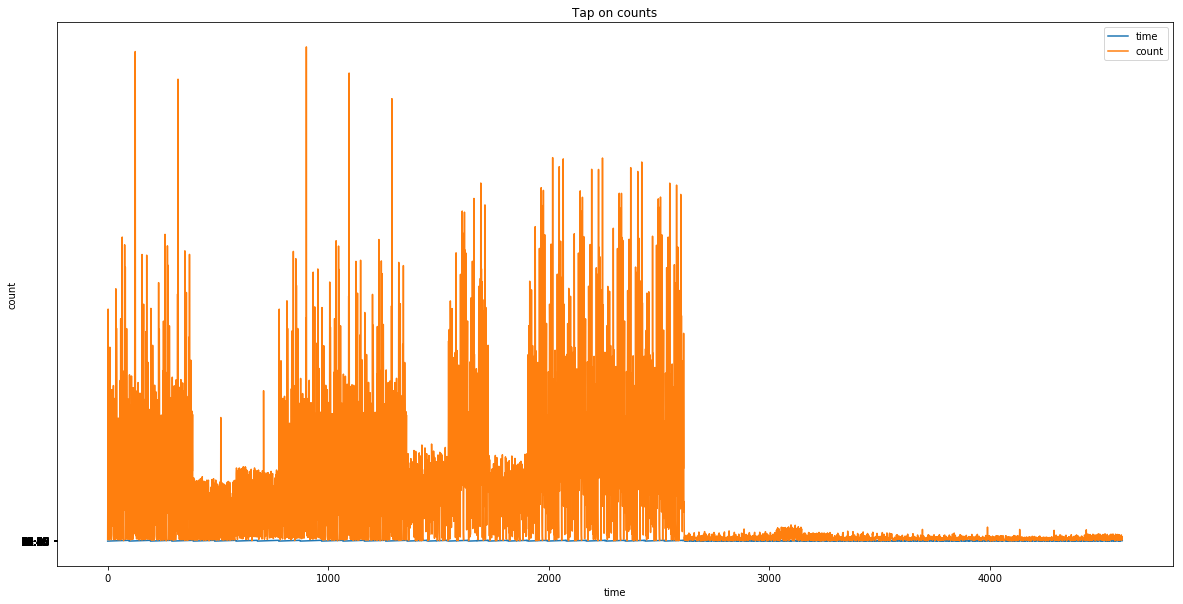

In [187]:
plt.plot(time, label='time')
plt.plot(count, label='count')
plt.title('Tap on counts')
plt.xlabel('time')
plt.ylabel('count')
plt.legend()

plt.show()

In [188]:
print (list(tap_on['time']))

['02:30', '13:30', '15:15', '12:45', '00:00', '16:30', '04:45', '03:45', '19:45', '01:30', '07:15', '09:00', '18:45', '11:30', '20:15', '00:15', '13:00', '02:45', '23:30', '17:45', '10:45', '05:15', '20:00', '12:30', '07:00', '14:15', '08:45', '23:45', '-1', '13:15', '11:45', '22:45', '05:00', '16:15', '01:15', '14:00', '21:15', '07:30', '06:30', '01:00', '15:00', '16:00', '23:15', '12:15', '21:00', '04:30', '05:30', '03:15', '14:30', '18:15', '06:45', '19:00', '12:00', '09:45', '23:00', '00:45', '04:00', '17:30', '10:15', '08:30', '03:00', '21:30', '15:45', '18:00', '20:30', '19:15', '08:00', '02:00', '13:45', '17:00', '09:30', '22:30', '04:15', '03:30', '10:00', '18:30', '20:45', '07:45', '06:00', '05:45', '08:15', '11:00', '02:15', '22:00', '17:15', '10:30', '15:30', '14:45', '00:30', '19:30', '06:15', '01:45', '16:45', '11:15', '09:15', '22:15', '21:45', '02:30', '13:30', '15:15', '12:45', '00:00', '16:30', '04:45', '03:45', '19:45', '01:30', '07:15', '09:00', '18:45', '11:30', '20

Data is messy. 

In [189]:


# def parse_time(row):
#     try:
#         new_t = datetime.strptime(row.time, "%H:%M")
# #         print(new_t)
#         return (new_t)
#     except Exception as e:
# #         print(t, e)
#         return None
        
    
# tap_on['dt'] = tap_on.apply(parse_time, axis=1)
# tap_on.sample(4)

In [190]:
# def parse_date(row):
#     try:
#         new_d = datetime.strptime(str(row.date), "%Y%m%d")
#         return(new_d)
#     except Exception as e:
#         print(row.date, e)
#         return None
        
    
# tap_on['dt_date'] = tap_on.apply(parse_date, axis=1)
# tap_on.sample(4)

In [191]:
d = datetime.strptime('Jul 28 2019', '%b %d %Y')
t = datetime.strptime('14:30', '%H:%M')
d, t
datetime(d.year,d.month,d.day,t.hour,t.minute)

datetime.datetime(2019, 7, 28, 14, 30)

In [192]:
#created a "new_dt" for the date and time in one object
def parse_time(row):
    try:
        new_t = datetime.strptime(row.time, "%H:%M")
        new_d = datetime.strptime(str(row.date), "%Y%m%d")
        dt = datetime(new_d.year,new_d.month,new_d.day,new_t.hour,new_t.minute)      
        return dt
    except Exception as e:
#         print(t, e)
        return None


tap_on["new_dt"] = tap_on.apply(parse_time, axis=1)
tap_on.sample(5)

,mode,date,tap,time,count,new_dt
3653,lightrail,20160728,off,10:30,253,2016-07-28 10:30:00
1738,train,20160731,on,18:45,5883,2016-07-31 18:45:00
2385,train,20160727,off,01:00,279,2016-07-27 01:00:00
2868,ferry,20160726,off,20:00,84,2016-07-26 20:00:00
2178,train,20160728,off,19:45,11281,2016-07-28 19:45:00


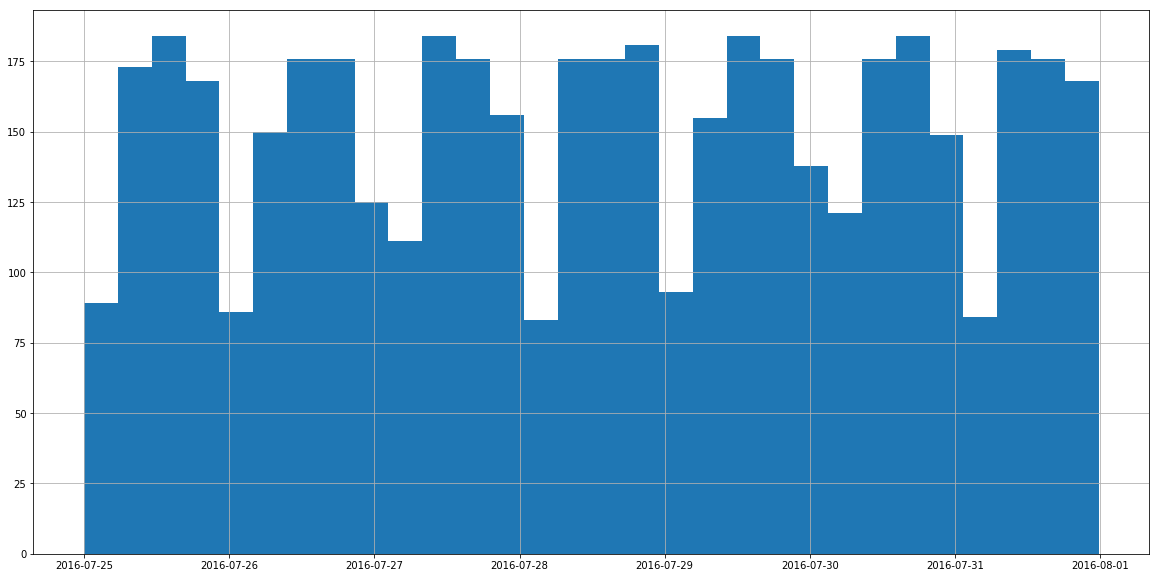

In [193]:
tap_on.new_dt.hist(bins=30)

![](https://cdn.pixabay.com/photo/2017/05/08/22/38/saturday-2296766_960_720.png)

In [194]:
def make_day(row):
    try:
        day = datetime.strftime(row.new_dt, "%A")
             
        return day
    except Exception as e:
#         print(t, e)
        return None


tap_on["day"] = tap_on.apply(make_day, axis=1)
tap_on.sample(5)

,mode,date,tap,time,count,new_dt,day
1499,train,20160730,off,06:45,3334,2016-07-30 06:45:00,Saturday
1761,train,20160731,on,21:15,3525,2016-07-31 21:15:00,Sunday
829,bus,20160729,on,09:45,10134,2016-07-29 09:45:00,Friday
2200,train,20160728,off,22:45,4450,2016-07-28 22:45:00,Thursday
2847,ferry,20160726,off,13:45,411,2016-07-26 13:45:00,Tuesday


In [195]:
tap_on.groupby(["mode","day"]).sum()

date    count
mode      day                           
bus       Friday     3870859968  1731002
          Monday     3870859200  1755397
          Saturday   3870860160   855058
          Sunday     3870860352   661268
          Thursday   3870859776  1803935
          Tuesday    3870859392  1778378
          Wednesday  3870859584  1769102
ferry     Friday     2882984247    66350
          Monday     2580572800    51012
          Saturday   2762020010    66507
          Sunday     2358805527   102472
          Thursday   2741859008    59897
          Tuesday    2661215832    54602
          Wednesday  2721698145    54454
lightrail Friday     3044270079    53004
          Monday     3165233825    71417
          Saturday   3084591690    44161
          Sunday     2943466726    47605
          Thursday   2882984104    49820
          Tuesday    2882983818    52764
          Wednesday  2923305415    50234
train     Friday     3669252678  2360344
          Monday     3528126875  2264242
          Saturday   3709574320  1097144
          Sunday     3548288656   932746
          Thursday   3548288128  2381206
          Tuesday    3507966324  2325770
          Wednesday  3548287952  2333294

In [196]:
tap_on.sample(10)

,mode,date,tap,time,count,new_dt,day
1986,train,20160726,on,00:30,171,2016-07-26 00:30:00,Tuesday
3099,ferry,20160731,off,16:30,2017,2016-07-31 16:30:00,Sunday
379,bus,20160726,off,00:30,368,2016-07-26 00:30:00,Tuesday
3884,lightrail,20160729,on,19:15,342,2016-07-29 19:15:00,Friday
299,bus,20160726,off,19:45,5561,2016-07-26 19:45:00,Tuesday
2888,ferry,20160729,on,13:30,608,2016-07-29 13:30:00,Friday
1868,train,20160731,off,00:45,526,2016-07-31 00:45:00,Sunday
3605,lightrail,20160728,on,16:00,490,2016-07-28 16:00:00,Thursday
2600,train,20160725,off,11:00,9209,2016-07-25 11:00:00,Monday
761,bus,20160730,off,02:15,496,2016-07-30 02:15:00,Saturday


In [197]:
barcolors = ['#bcf7ef', '#bcd5f7', '#f4ccfc', '#fccce1']

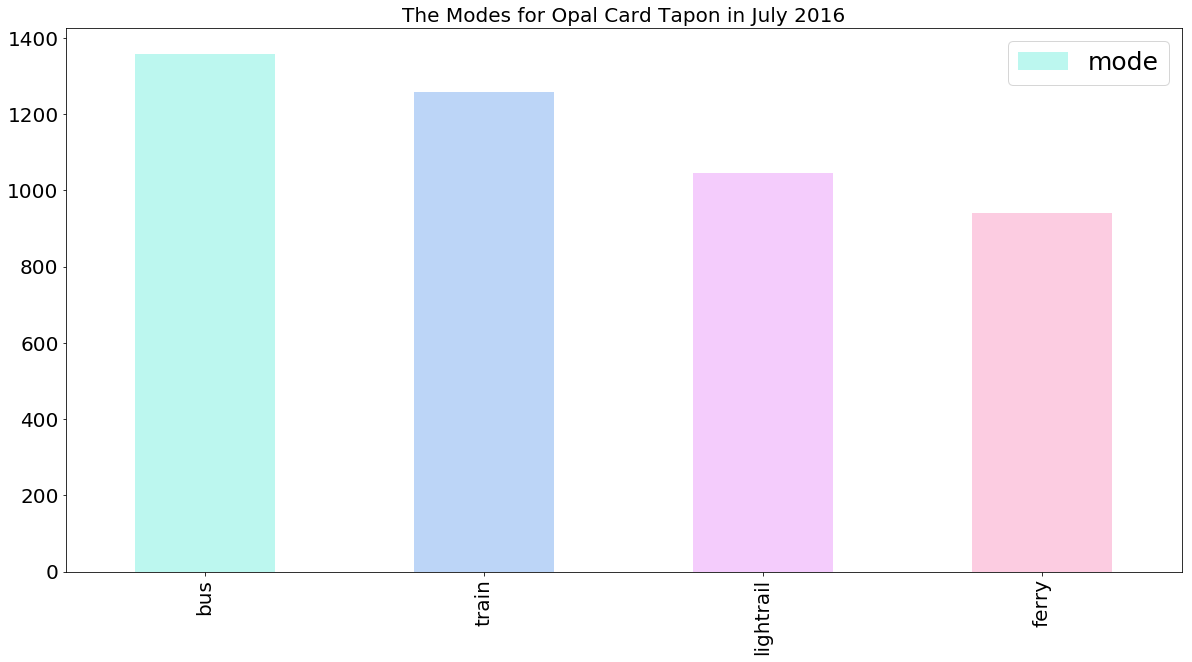

In [198]:
tap_on['mode'].value_counts().plot(kind= "bar", color= barcolors)
plt.legend(fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.title("The Modes for Opal Card Tapon in July 2016",fontsize=20)
plt.savefig('The image 1')

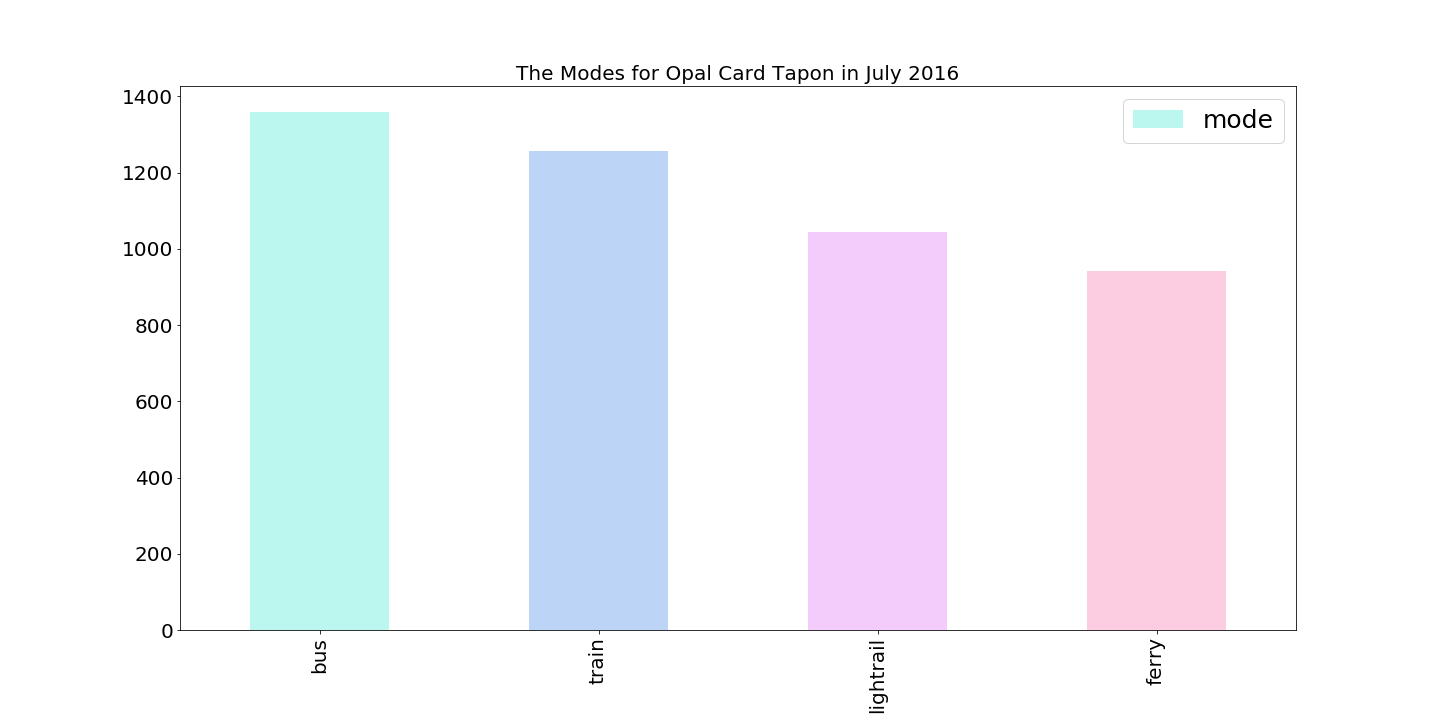

In [199]:
Image(filename= 'The image 1.png', width=3500)

In [200]:
bars= ['#faa5e6', '#bcd5f7']

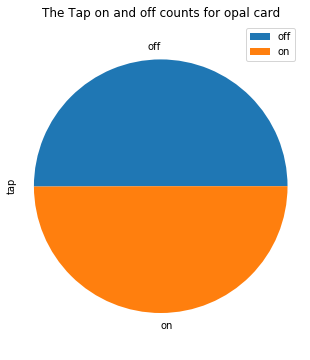

In [201]:
ax= tap_on['tap'].value_counts().plot.pie(figsize=(5,6))
plt.title('The Tap on and off counts for opal card')
plt.axis('equal')
plt.legend(loc='upper right')
plt.savefig('Pie chart')
plt.show()

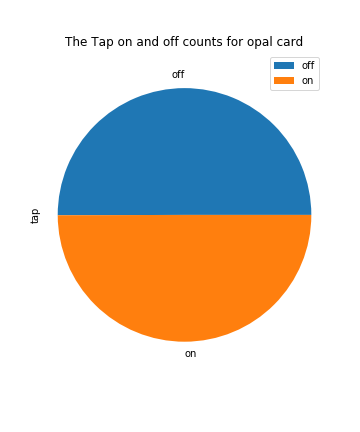

In [202]:
Image(filename= 'Pie chart.png', width=500)

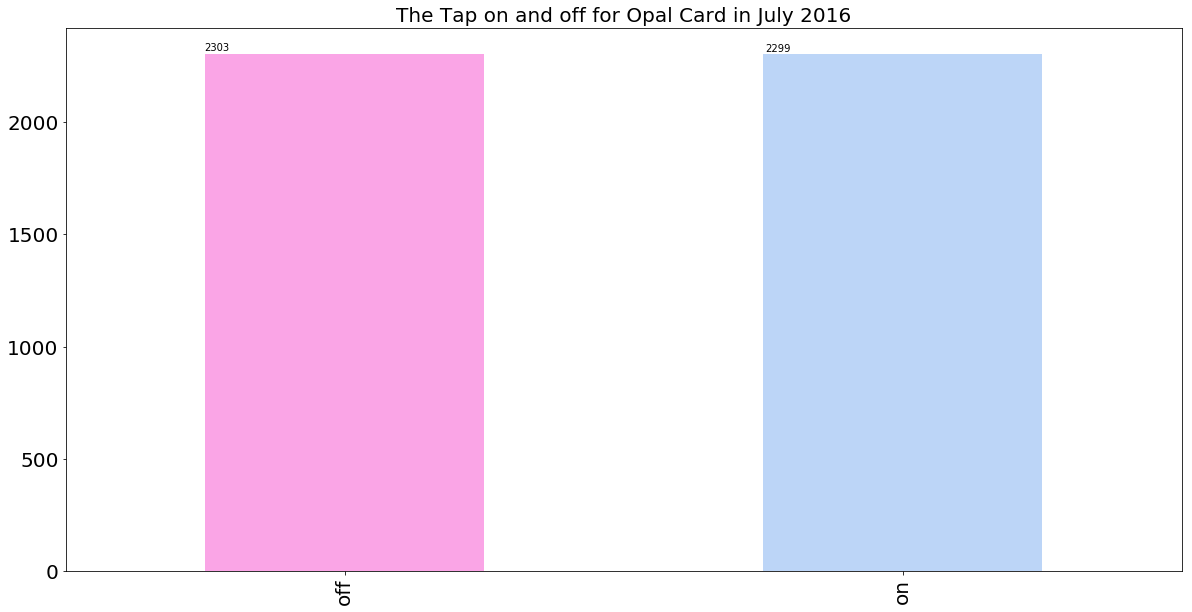

In [203]:
ax= tap_on['tap'].value_counts().plot(kind= "bar", color= bars)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title("The Tap on and off for Opal Card in July 2016",fontsize=20)
plt.savefig('The image 2')

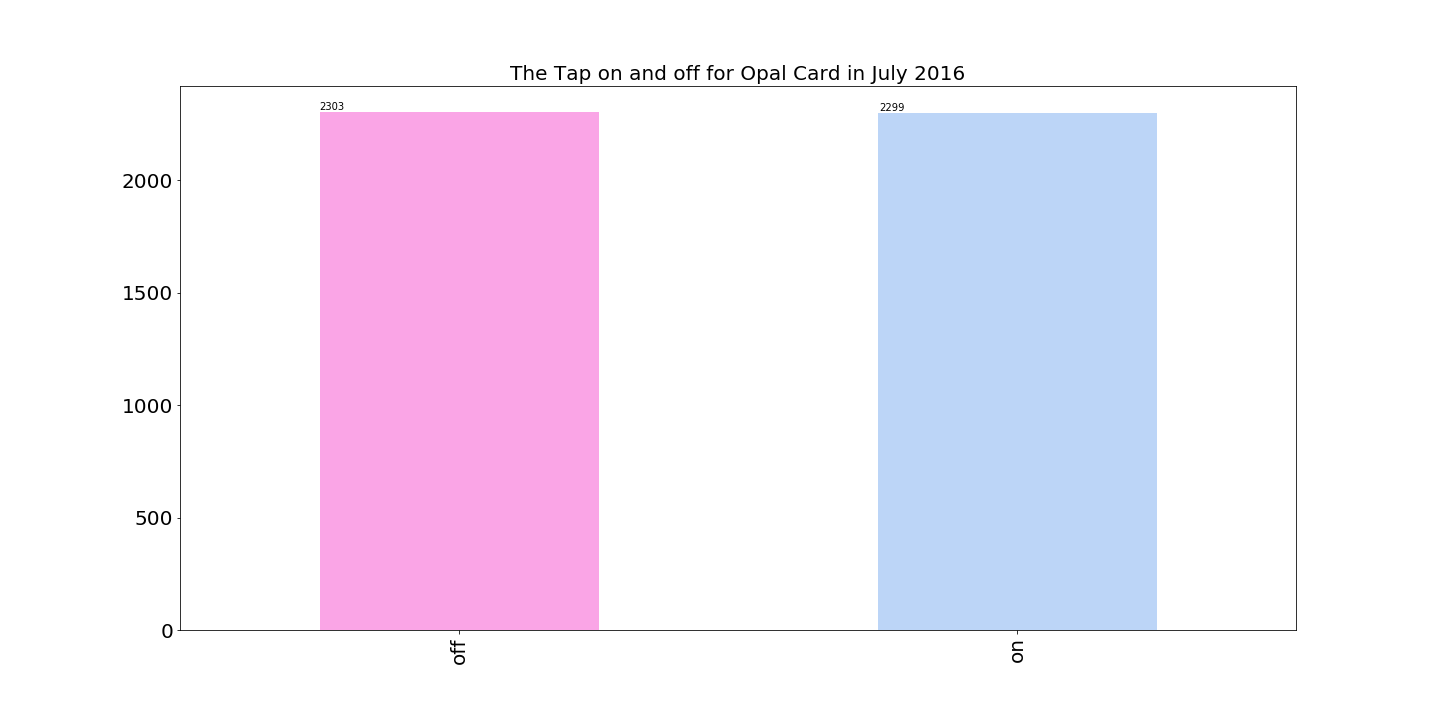

In [204]:
Image(filename= 'The image 2.png', width=3500)

In [205]:
bus_tapon = tap_on.loc[(tap_on['mode']=='bus') & (tap_on['tap']=='on')]
bus_tapon.sample(10)

,mode,date,tap,time,count,new_dt,day
1046,bus,20160727,on,20:45,3225,2016-07-27 20:45:00,Wednesday
676,bus,20160730,on,09:15,6851,2016-07-30 09:15:00,Saturday
861,bus,20160729,on,10:30,9759,2016-07-29 10:30:00,Friday
649,bus,20160730,on,02:00,599,2016-07-30 02:00:00,Saturday
440,bus,20160731,on,12:00,7064,2016-07-31 12:00:00,Sunday
468,bus,20160731,on,08:15,3169,2016-07-31 08:15:00,Sunday
673,bus,20160730,on,01:45,526,2016-07-30 01:45:00,Saturday
597,bus,20160730,on,00:15,1005,2016-07-30 00:15:00,Saturday
82,bus,20160728,on,02:15,216,2016-07-28 02:15:00,Thursday
978,bus,20160727,on,19:45,4655,2016-07-27 19:45:00,Wednesday


In [232]:
#the tap on count for Bus from Monday to Sunday
grouped = bus_tapon.groupby(["day","count"]).sum()
grouped_bus = (bus_tapon.groupby(by='day').agg({'count':sum}).reset_index())
print (grouped_bus)

         day   count
0     Friday  896144
1     Monday  905194
2   Saturday  436738
3     Sunday  338147
4   Thursday  932350
5    Tuesday  917860
6  Wednesday  913654


In [233]:
new_grouped_bus = grouped_bus.reindex([1,5,6,4,0,2,3])
print(new_grouped_bus)

         day   count
1     Monday  905194
5    Tuesday  917860
6  Wednesday  913654
4   Thursday  932350
0     Friday  896144
2   Saturday  436738
3     Sunday  338147


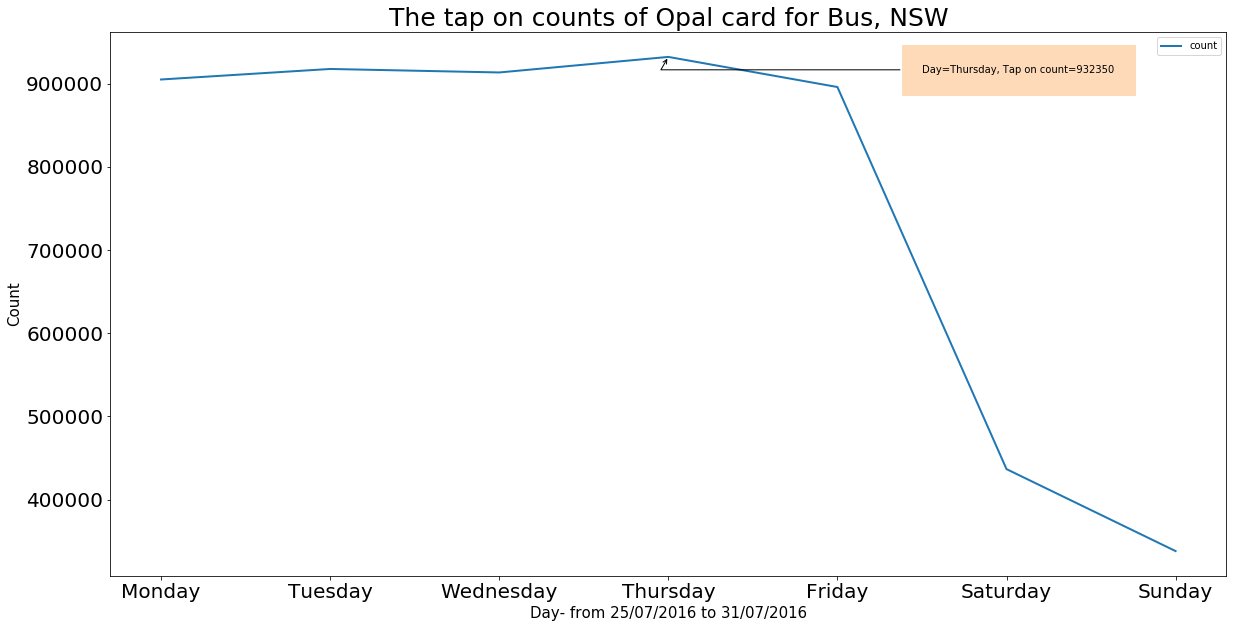

In [234]:
plt.plot(new_grouped_bus['day'],new_grouped_bus['count'], linewidth=2.0)
plt.title('The tap on counts of Opal card for Bus, NSW', fontsize=25)
plt.xlabel('Day- from 25/07/2016 to 31/07/2016', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

x= new_grouped_bus['day']
y=new_grouped_bus['count']
def find_max(x= new_grouped_bus['day'],y= new_grouped_bus['count'], ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "Day={0}, Tap on count={1}".format(xmax, ymax)
    if not ax:
        # get current axis from this step
        ax=plt.gca()
    box = dict(boxstyle="square,pad=2",color= 'peachpuff', lw=1)
    arrow=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrow, bbox=box, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.9,0.94), **kw)

find_max(x,y)
plt.legend()
plt.show()

In [208]:
test= tap_on.loc[(tap_on['mode']=='bus') & (tap_on['tap']=='on')& (tap_on['day']=='Sunday')]
print (test['count'].sum())

338147


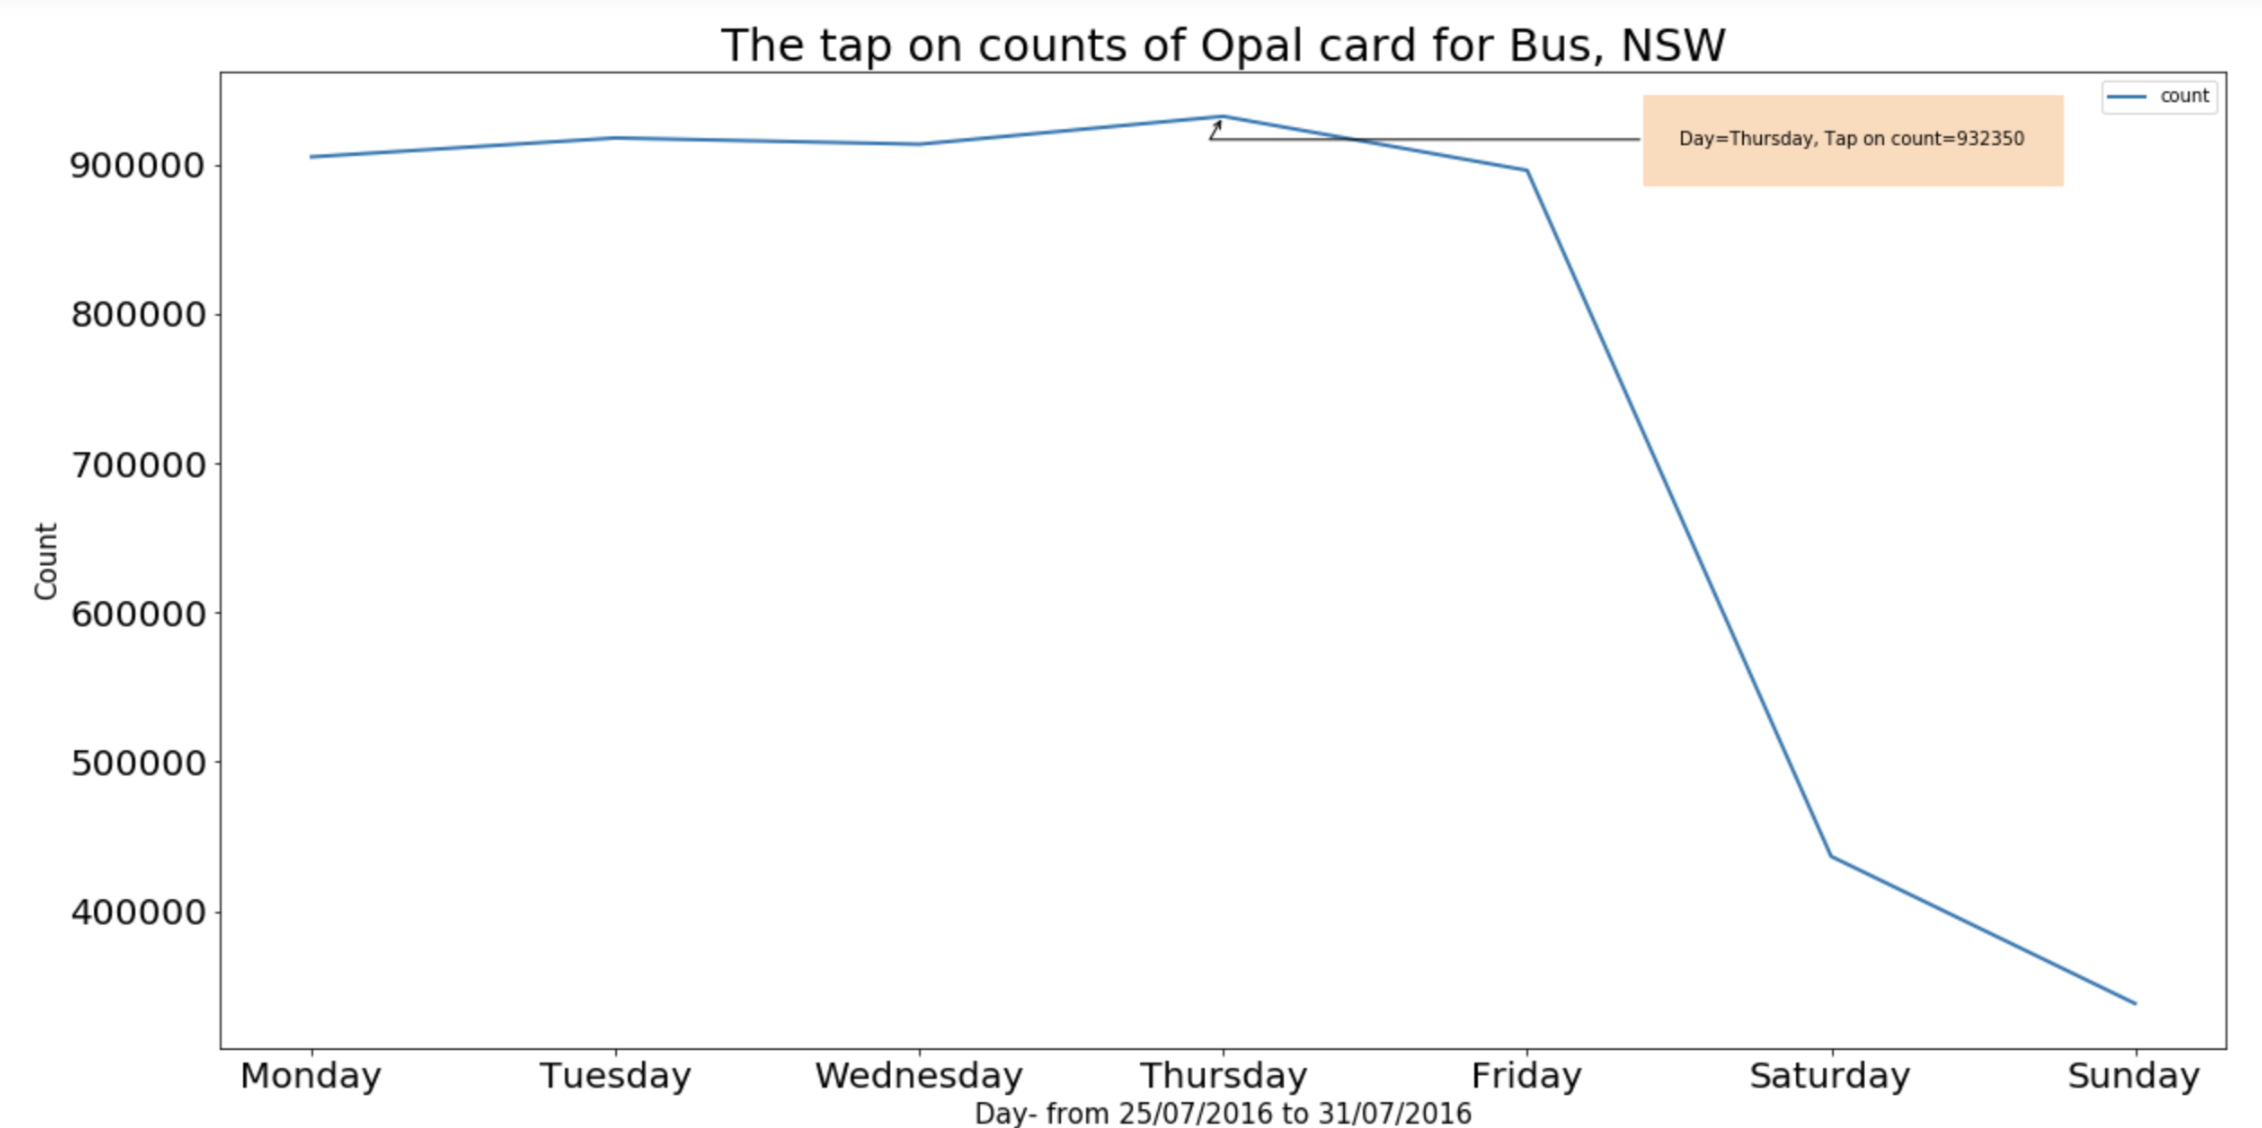

In [209]:
Image(filename= 'The image bus.png', width=3500)

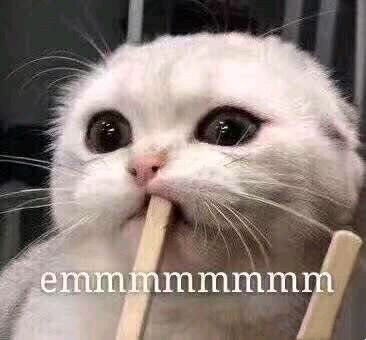

In [210]:
Image(filename= 'emmm.jpg', width=500)

![](https://media.istockphoto.com/photos/pay-day-written-with-red-mark-picture-id655788384?k=6&m=655788384&s=612x612&w=0&h=RLWRhzQifviD_AQkjzyXxEM2vh9P-4A_bXLgcLCcNZo=)

Payday. Stores also have extended hours on these days.

![](https://static.nsw.gov.au/Uploads/images/1502670798/Shopping-in-Pitt-Street-Mall-Sydney.jpg)
Thursday is the shopping day.

![](https://www.transport.nsw.gov.au/sites/default/files/styles/content_mobile_1x/public/media/images/2017/nswtrains-header.jpg?itok=sktPQLoJ)

What about the train? 

         day    count
0     Friday  1184623
1     Monday  1136075
2   Saturday   550851
3     Sunday   468037
4   Thursday  1194447
5    Tuesday  1166431
6  Wednesday  1170447


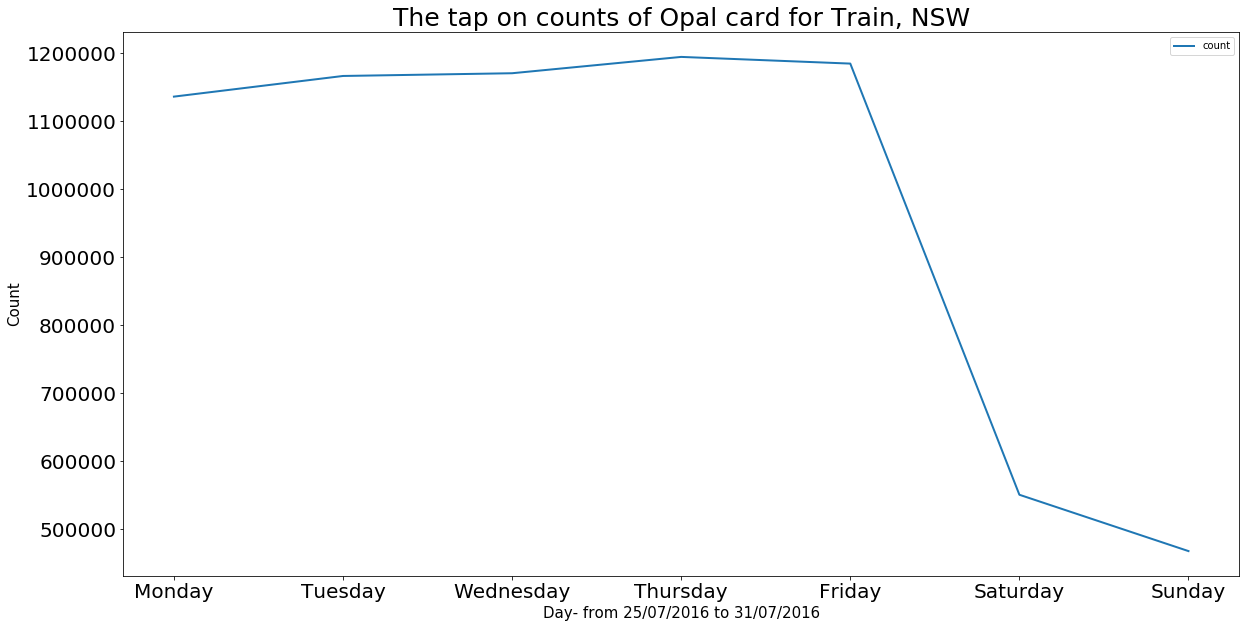

In [211]:
#the tap on count for train from Monday to Sunday
train_tapon = tap_on.loc[(tap_on['mode']=='train') & (tap_on['tap']=='on')]
grouped2 = train_tapon.groupby(["day","count"]).sum()
grouped_train = (train_tapon.groupby(by='day').agg({'count':sum}).reset_index())
print (grouped_train)

new_grouped_train = grouped_train.reindex([1,5,6,4,0,2,3])
plt.plot(new_grouped_train['day'],new_grouped_train['count'], linewidth=2.0)
plt.title('The tap on counts of Opal card for Train, NSW', fontsize=25)
plt.xlabel('Day- from 25/07/2016 to 31/07/2016', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend()
plt.show()

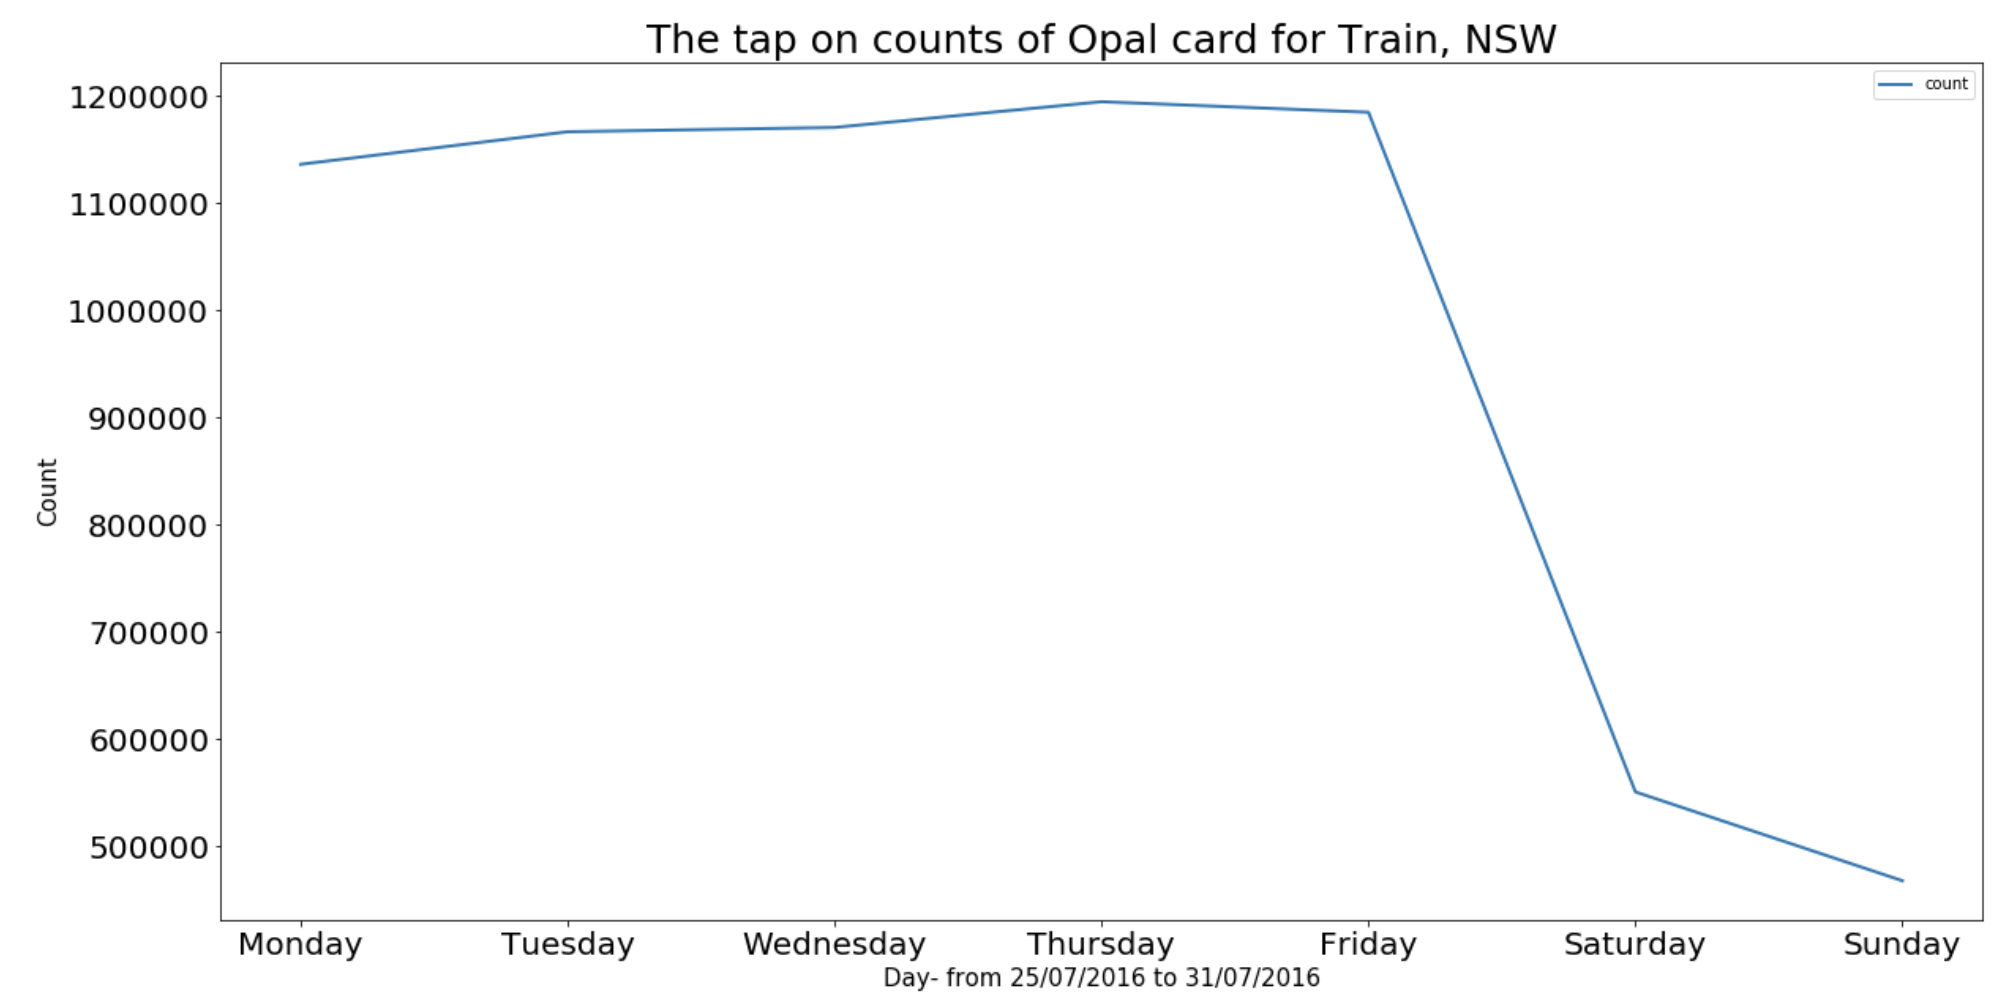

In [212]:
Image(filename= 'The image 3.png', width=3500)

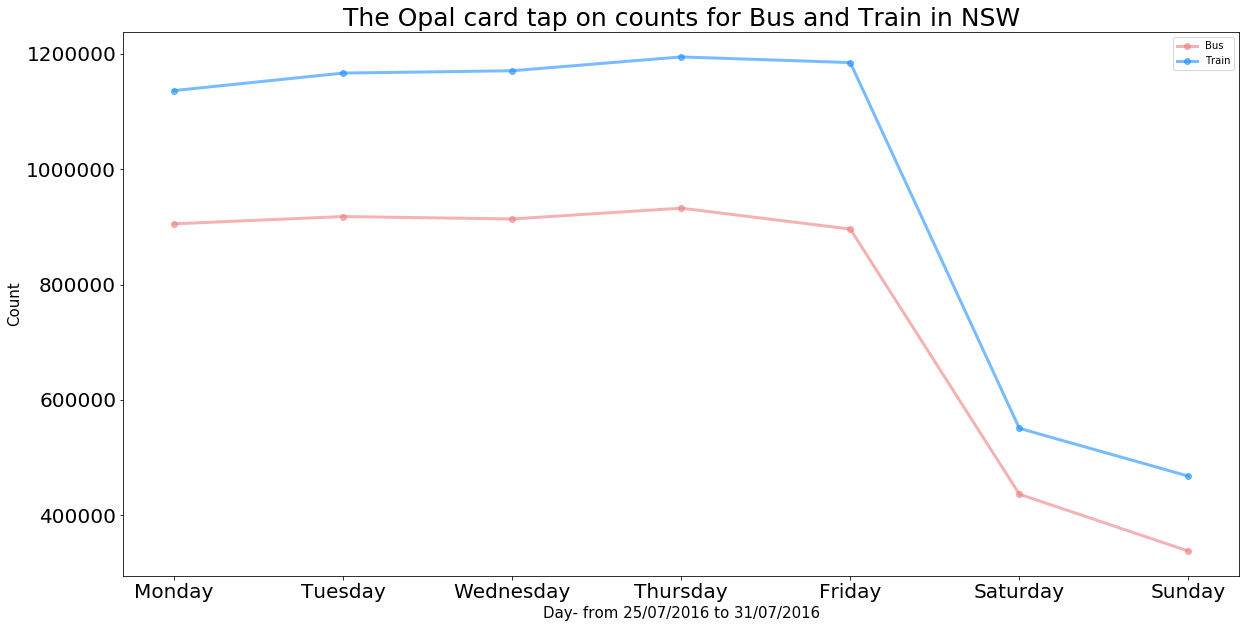

In [213]:
#Compare the Bus and Train in NSW
plt.title('The Opal card tap on counts for Bus and Train in NSW',fontsize=25)
plt.plot(new_grouped_bus['day'],new_grouped_bus['count'], color='lightcoral',marker='o', label= 'Bus',linewidth=3.0,alpha=0.6)
plt.plot(new_grouped_train['day'],new_grouped_train['count'],color='dodgerblue',marker='o', label='Train', linewidth=3.0,alpha=0.6)

plt.legend() 
 
plt.xlabel('Day- from 25/07/2016 to 31/07/2016', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()


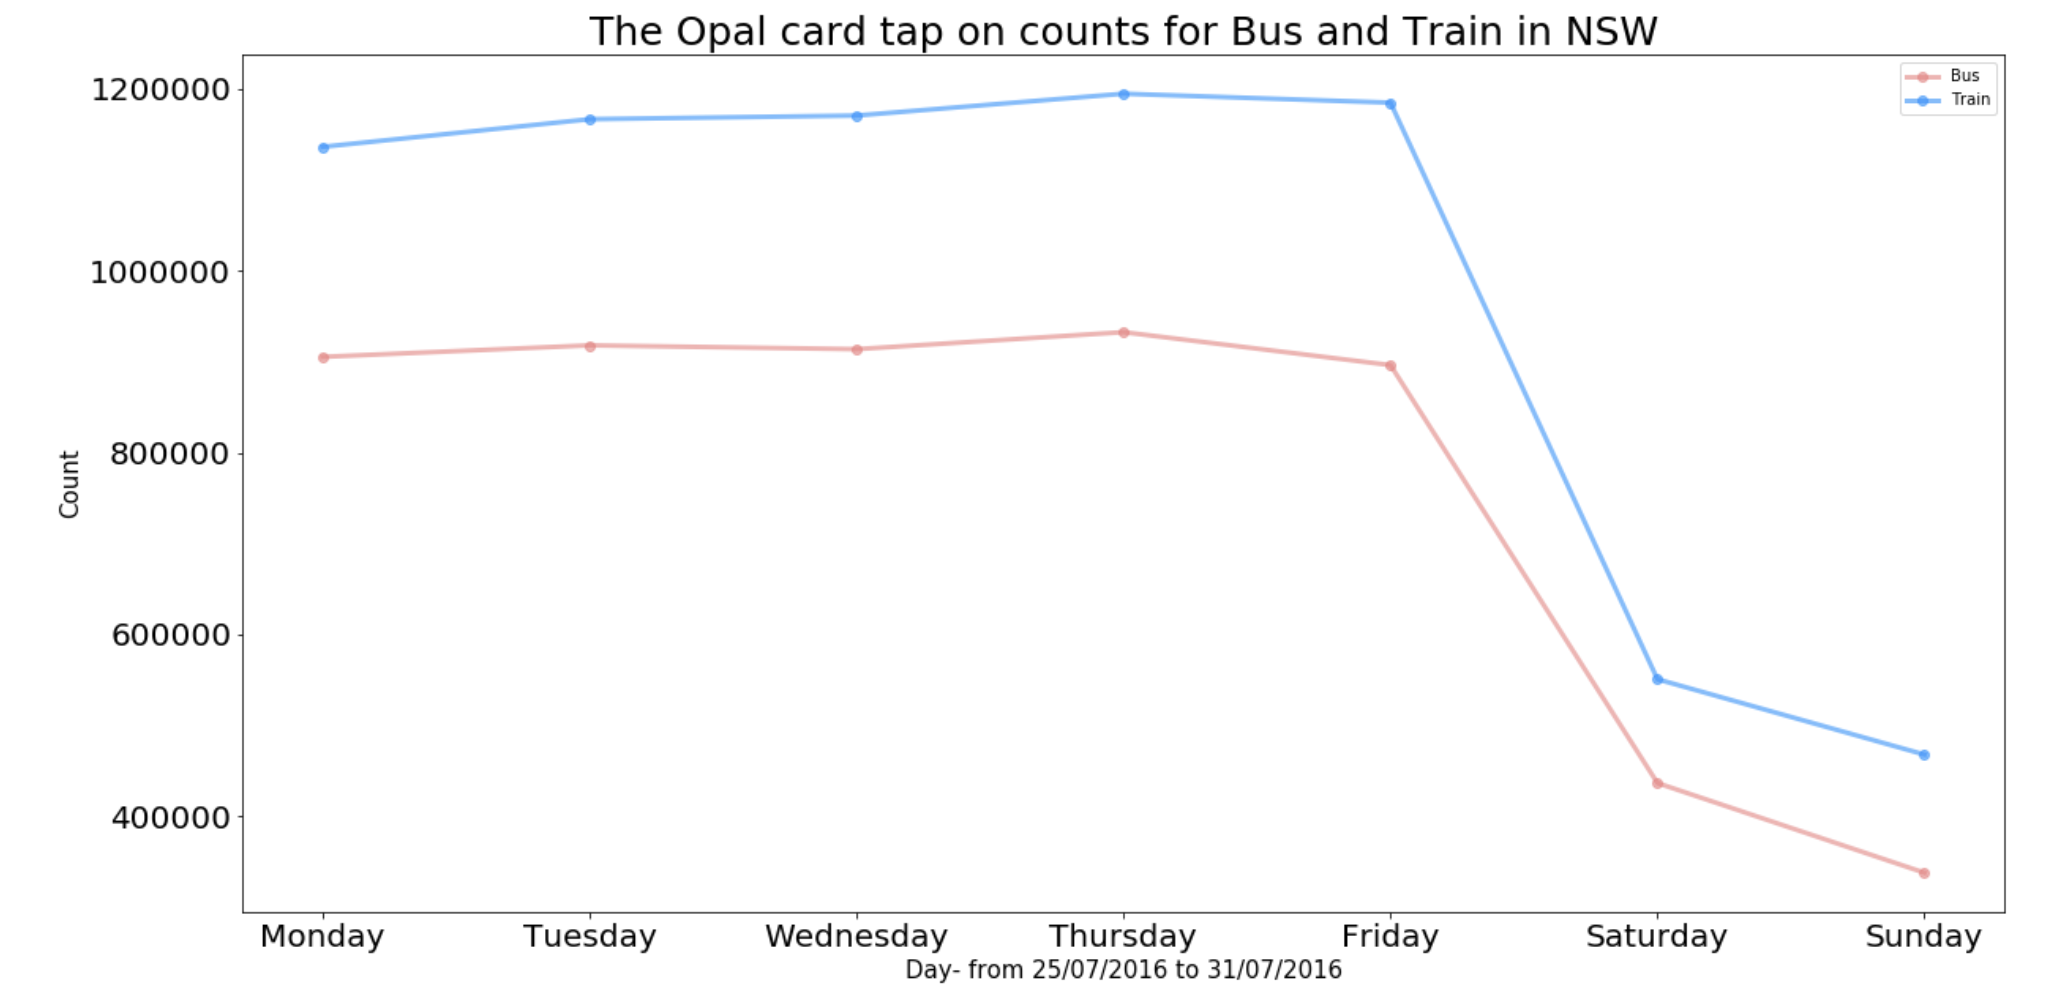

In [214]:
Image(filename='Bus & Train.png', width=3500)

In [215]:
#the tap on count for lightrail and ferry 
lightrail_tapon = tap_on.loc[(tap_on['mode']=='lightrail') & (tap_on['tap']=='on')]
grouped3 = train_tapon.groupby(["day","count"]).sum()
grouped_lightrail = (lightrail_tapon.groupby(by='day').agg({'count':sum}).reset_index())
new_grouped_lightrail = grouped_lightrail.reindex([1,5,6,4,0,2,3])

ferry_tapon = tap_on.loc[(tap_on['mode']=='ferry') & (tap_on['tap']=='on')]
grouped4 = ferry_tapon.groupby(["day","count"]).sum()
grouped_ferry = (ferry_tapon.groupby(by='day').agg({'count':sum}).reset_index())
new_grouped_ferry = grouped_ferry.reindex([1,5,6,4,0,2,3])


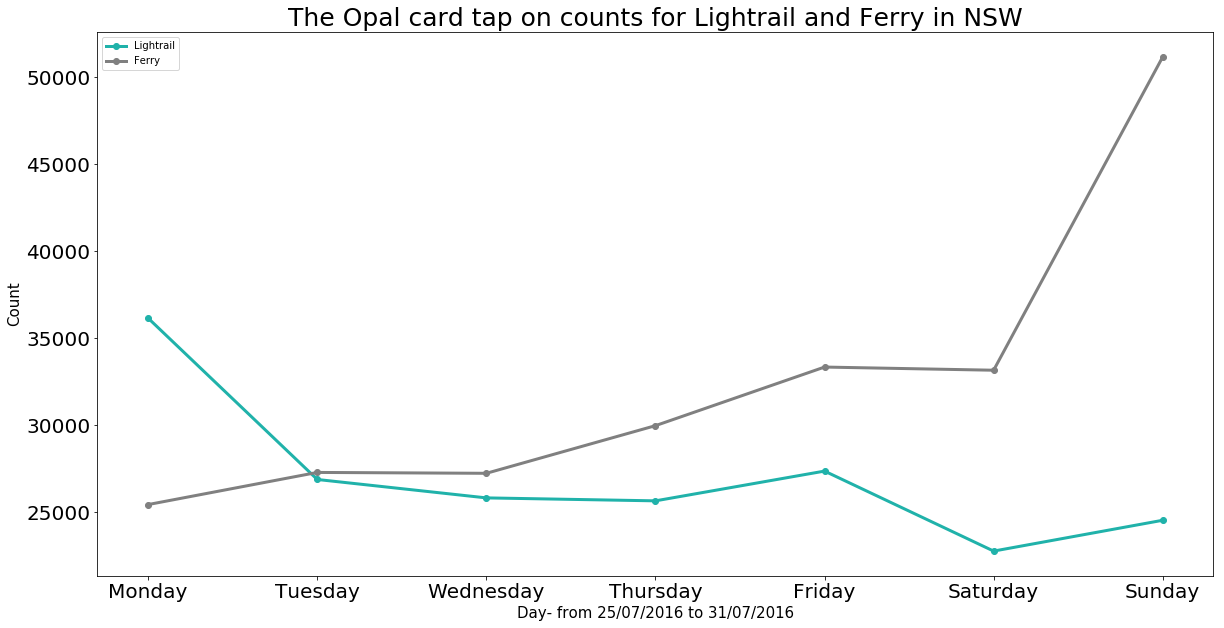

In [216]:
#Line chart for the lightrail and ferry
plt.plot(new_grouped_lightrail['day'],new_grouped_lightrail['count'],color='lightseagreen',marker='o',label='Lightrail', linewidth=3.0,)
plt.plot(new_grouped_ferry['day'],new_grouped_ferry['count'], color='grey',marker='o',label='Ferry', linewidth=3.0)


plt.title('The Opal card tap on counts for Lightrail and Ferry in NSW', fontsize=25)
plt.xlabel('Day- from 25/07/2016 to 31/07/2016', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

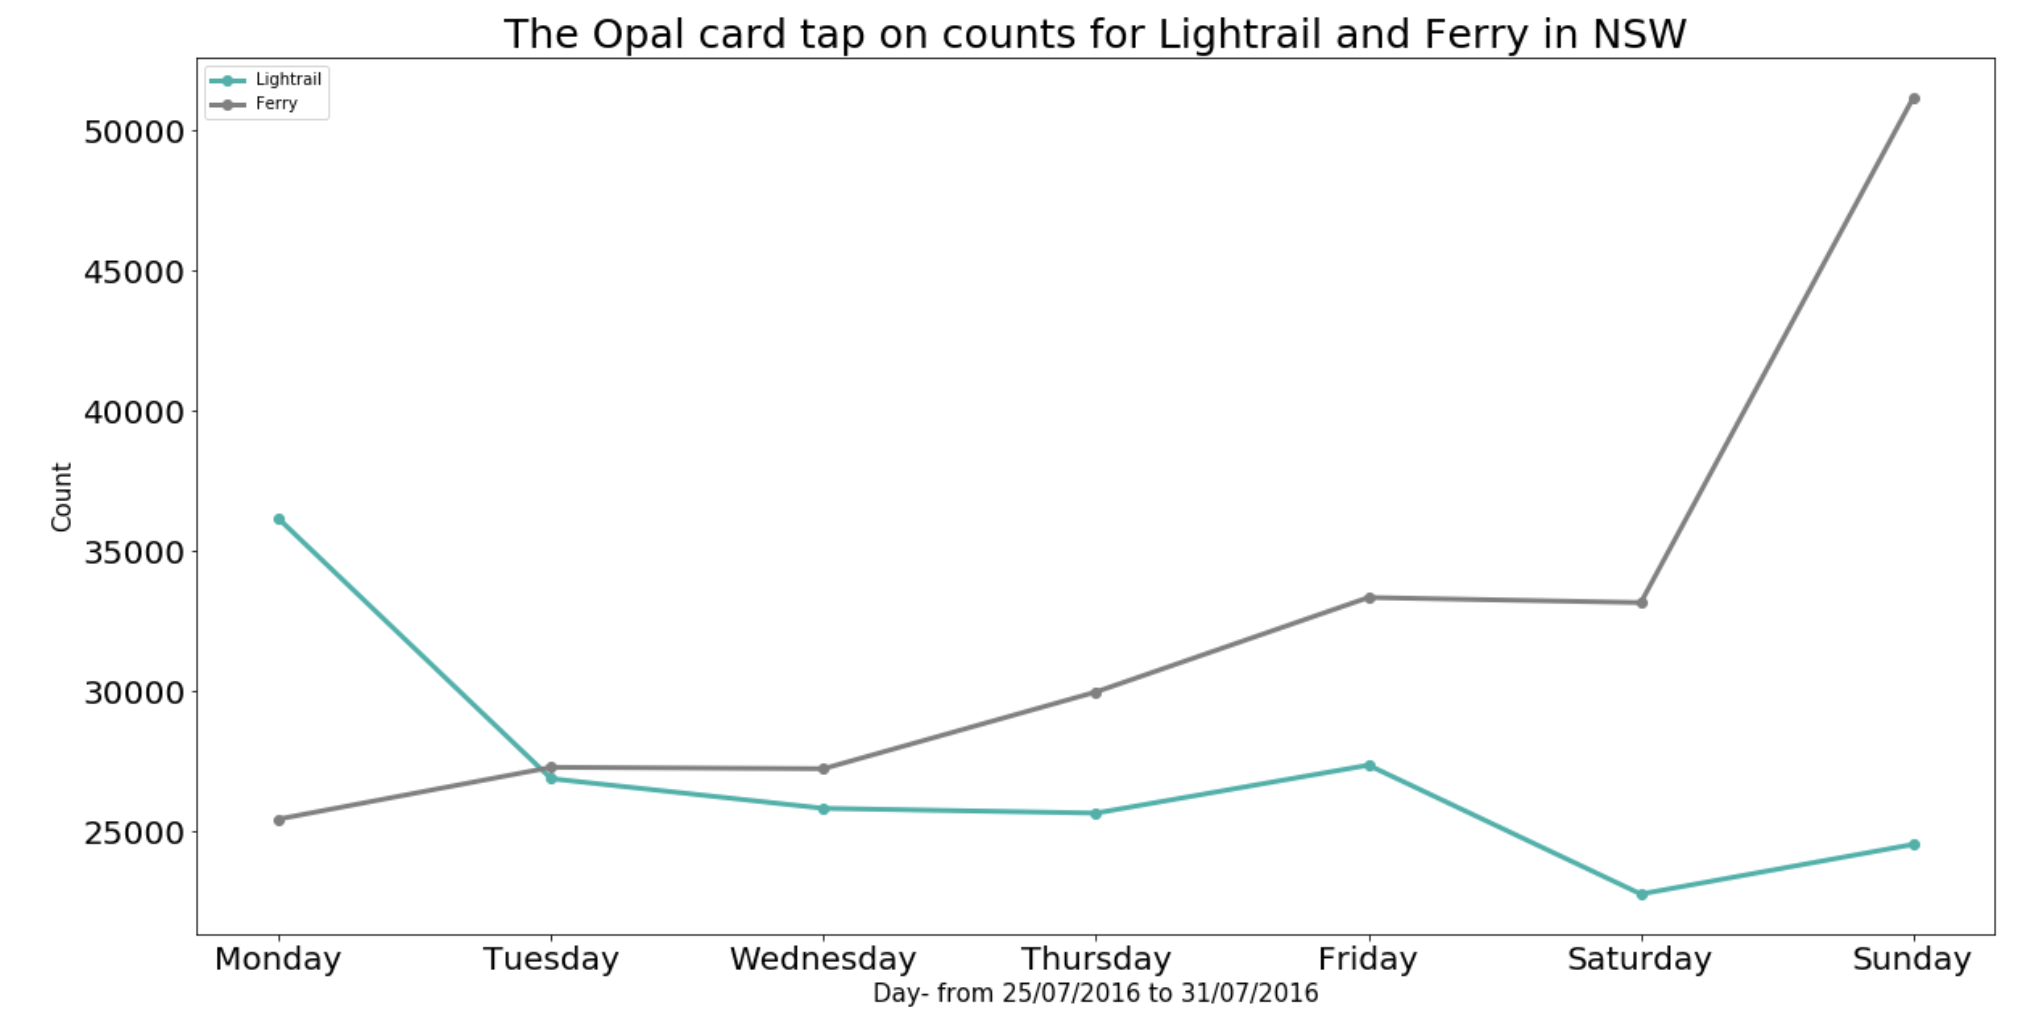

In [217]:
Image(filename='Lightrail & Ferry.png', width=3500)

Lightrail and ferry

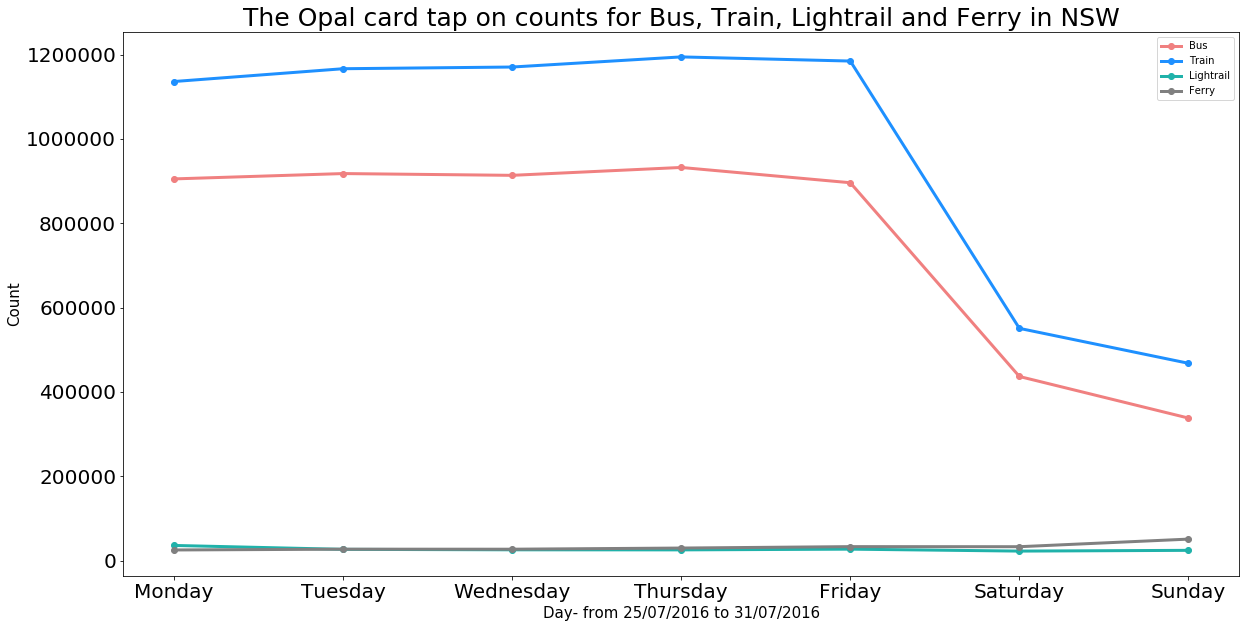

In [218]:
#Compare the Bus and Train in NSW
plt.title('The Opal card tap on counts for Bus, Train, Lightrail and Ferry in NSW',fontsize=25)
plt.plot(new_grouped_bus['day'],new_grouped_bus['count'], color='lightcoral',marker='o', label= 'Bus',linewidth=3.0,)
plt.plot(new_grouped_train['day'],new_grouped_train['count'],color='dodgerblue',marker='o', label='Train', linewidth=3.0,)
plt.plot(new_grouped_lightrail['day'],new_grouped_lightrail['count'],color='lightseagreen',marker='o',label='Lightrail', linewidth=3.0,)
plt.plot(new_grouped_ferry['day'],new_grouped_ferry['count'], color='grey',marker='o',label='Ferry', linewidth=3.0)

plt.legend() 
 
plt.xlabel('Day- from 25/07/2016 to 31/07/2016',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()


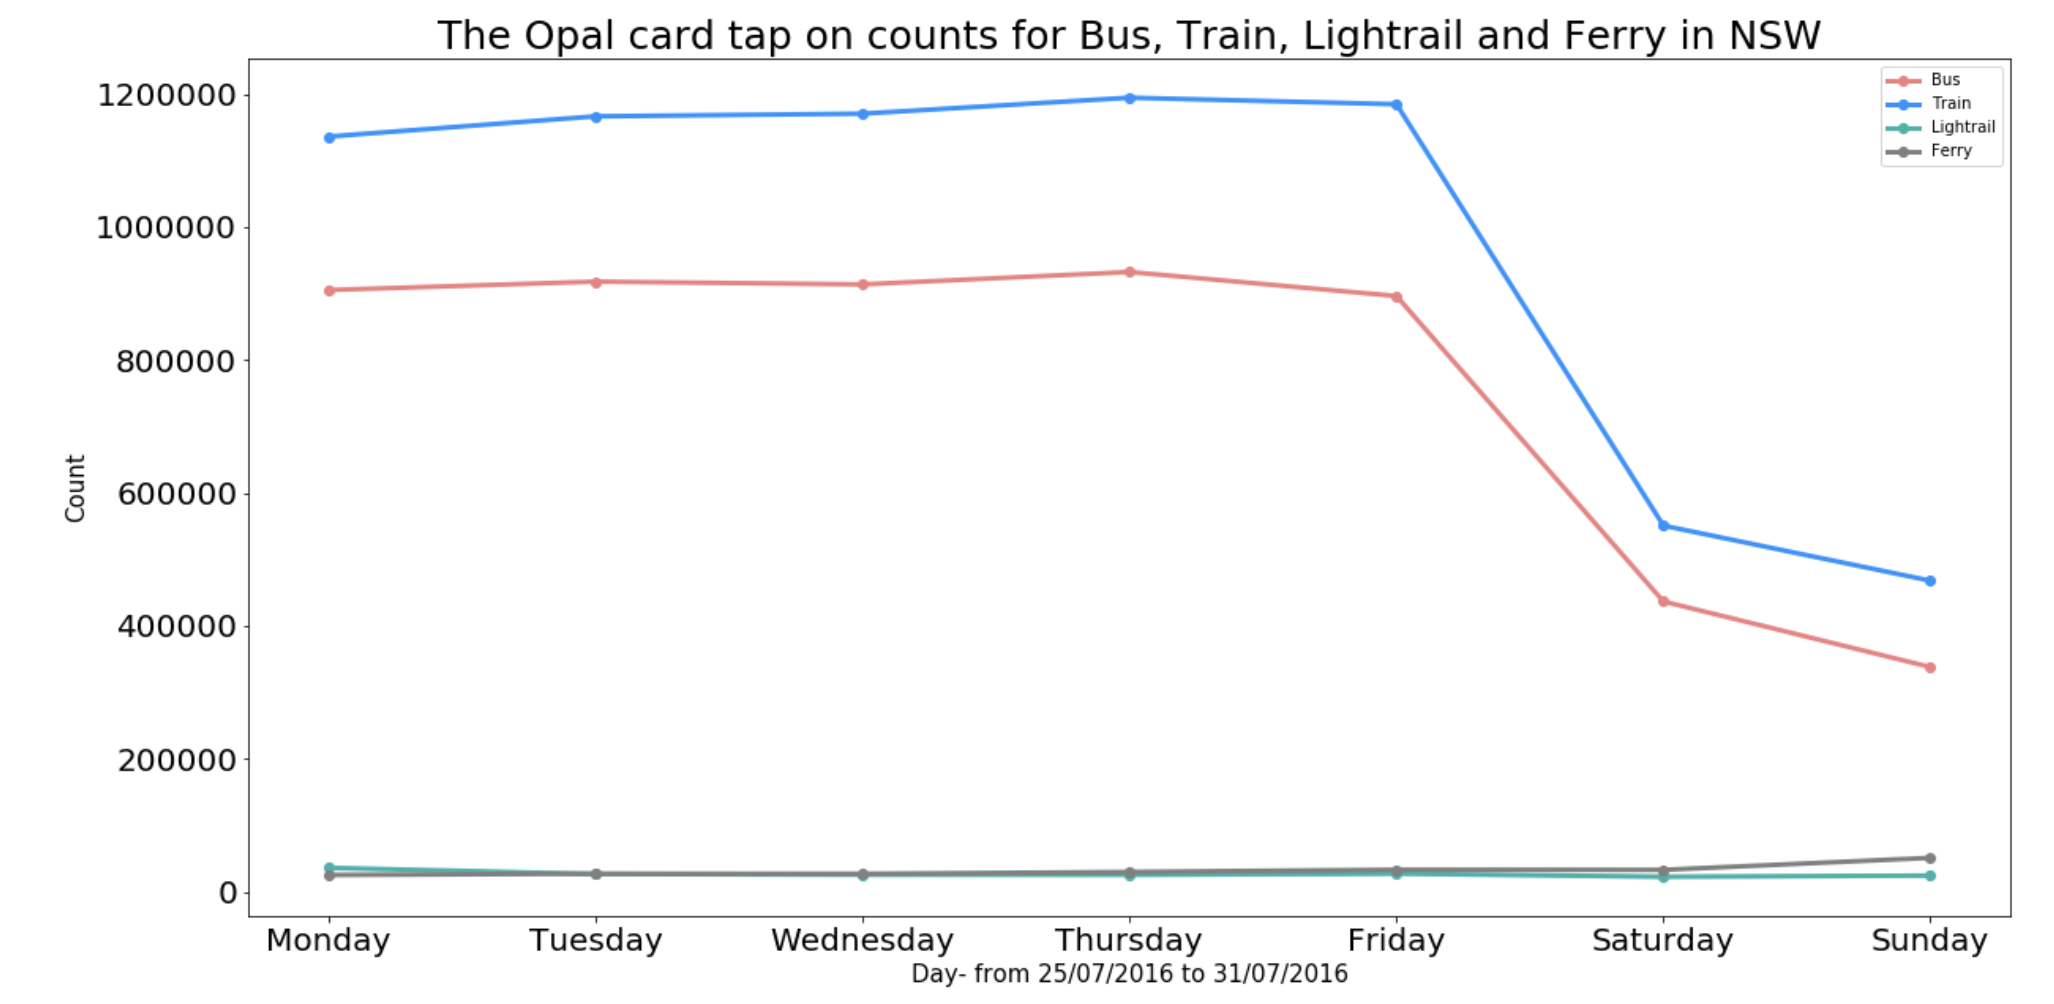

In [219]:
Image(filename='The Full Chart.png', width=3500)

![](https://www.moroccoworldnews.com/wp-content/uploads/2018/03/People-going-to-work.jpg)
![](https://www.mykidstime.com/wp-content/uploads/2016/02/Brittany-ferries-family-shot.jpg)

Pick a specific day?
![](https://www.scienceabc.com/wp-content/uploads/2015/11/Clock.jpg)

In [220]:
#What happened on 25th of July's Bus?
One_day= tap_on.loc[(tap_on['mode']=='bus') & (tap_on['tap']=='on')& (tap_on['date']== 20160725)]

oneDay =One_day[['time', 'count','new_dt']]
ordered_day = oneDay.sort_values(by = 'time')

#delete the "-1"
new_one_day= ordered_day[ordered_day.time != '-1']
new_one_day.sample(10)

,time,count,new_dt
1223,08:30,26718,2016-07-25 08:30:00
1176,18:45,9875,2016-07-25 18:45:00
1185,05:15,1860,2016-07-25 05:15:00
1174,07:15,23231,2016-07-25 07:15:00
1188,07:00,16591,2016-07-25 07:00:00
1233,17:00,21297,2016-07-25 17:00:00
1216,12:00,9969,2016-07-25 12:00:00
1258,09:15,12733,2016-07-25 09:15:00
1253,19:30,5727,2016-07-25 19:30:00
1190,08:45,18476,2016-07-25 08:45:00


/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


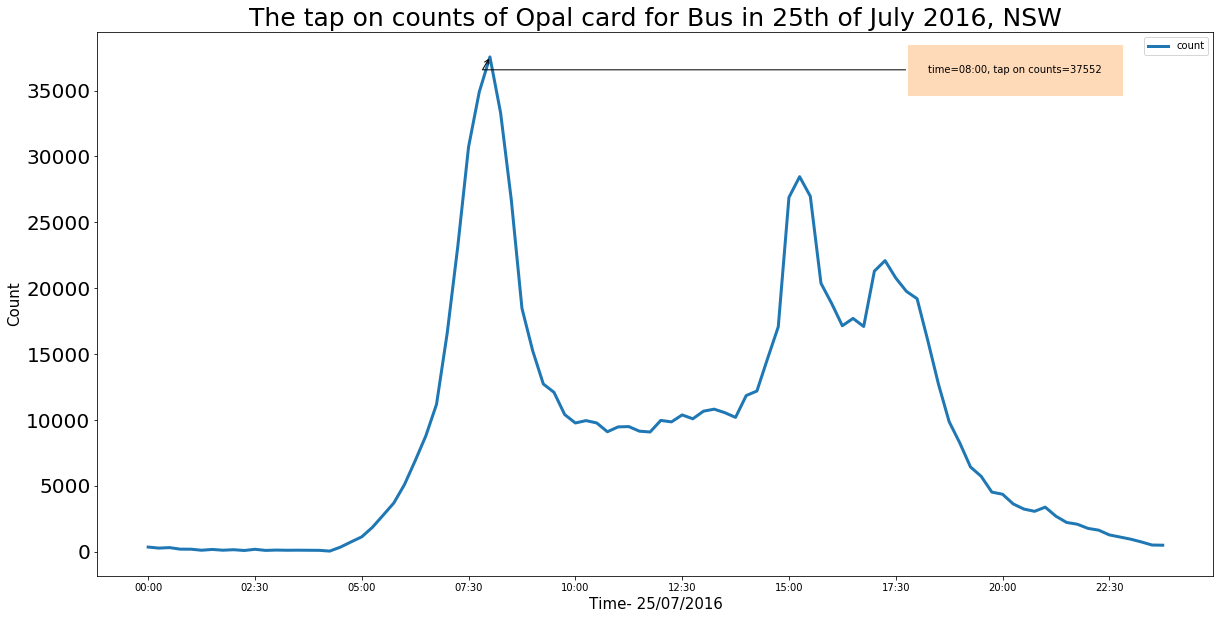

In [221]:
#Time and tap on counts
plt.plot(new_one_day['time'],new_one_day['count'], linewidth=3.0)
plt.title('The tap on counts of Opal card for Bus in 25th of July 2016, NSW', fontsize=25)
plt.xlabel('Time- 25/07/2016', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.legend()

x= new_one_day['time']
y= new_one_day['count']
ax=None
def get_the_max(x= new_one_day['time'],y= new_one_day['count'], ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "time={0}, tap on counts={1}".format(xmax, ymax)
    if not ax:
        # get current axis from this step
        ax=plt.gca()
    box = dict(boxstyle="square,pad=2",color= 'peachpuff', lw=1)
    arrow=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrow, bbox=box, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.9,0.94), **kw)

get_the_max(x,y)


xticks = plt.gca().xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 10 != 0:
        xticks[i].set_visible(False)

plt.show()

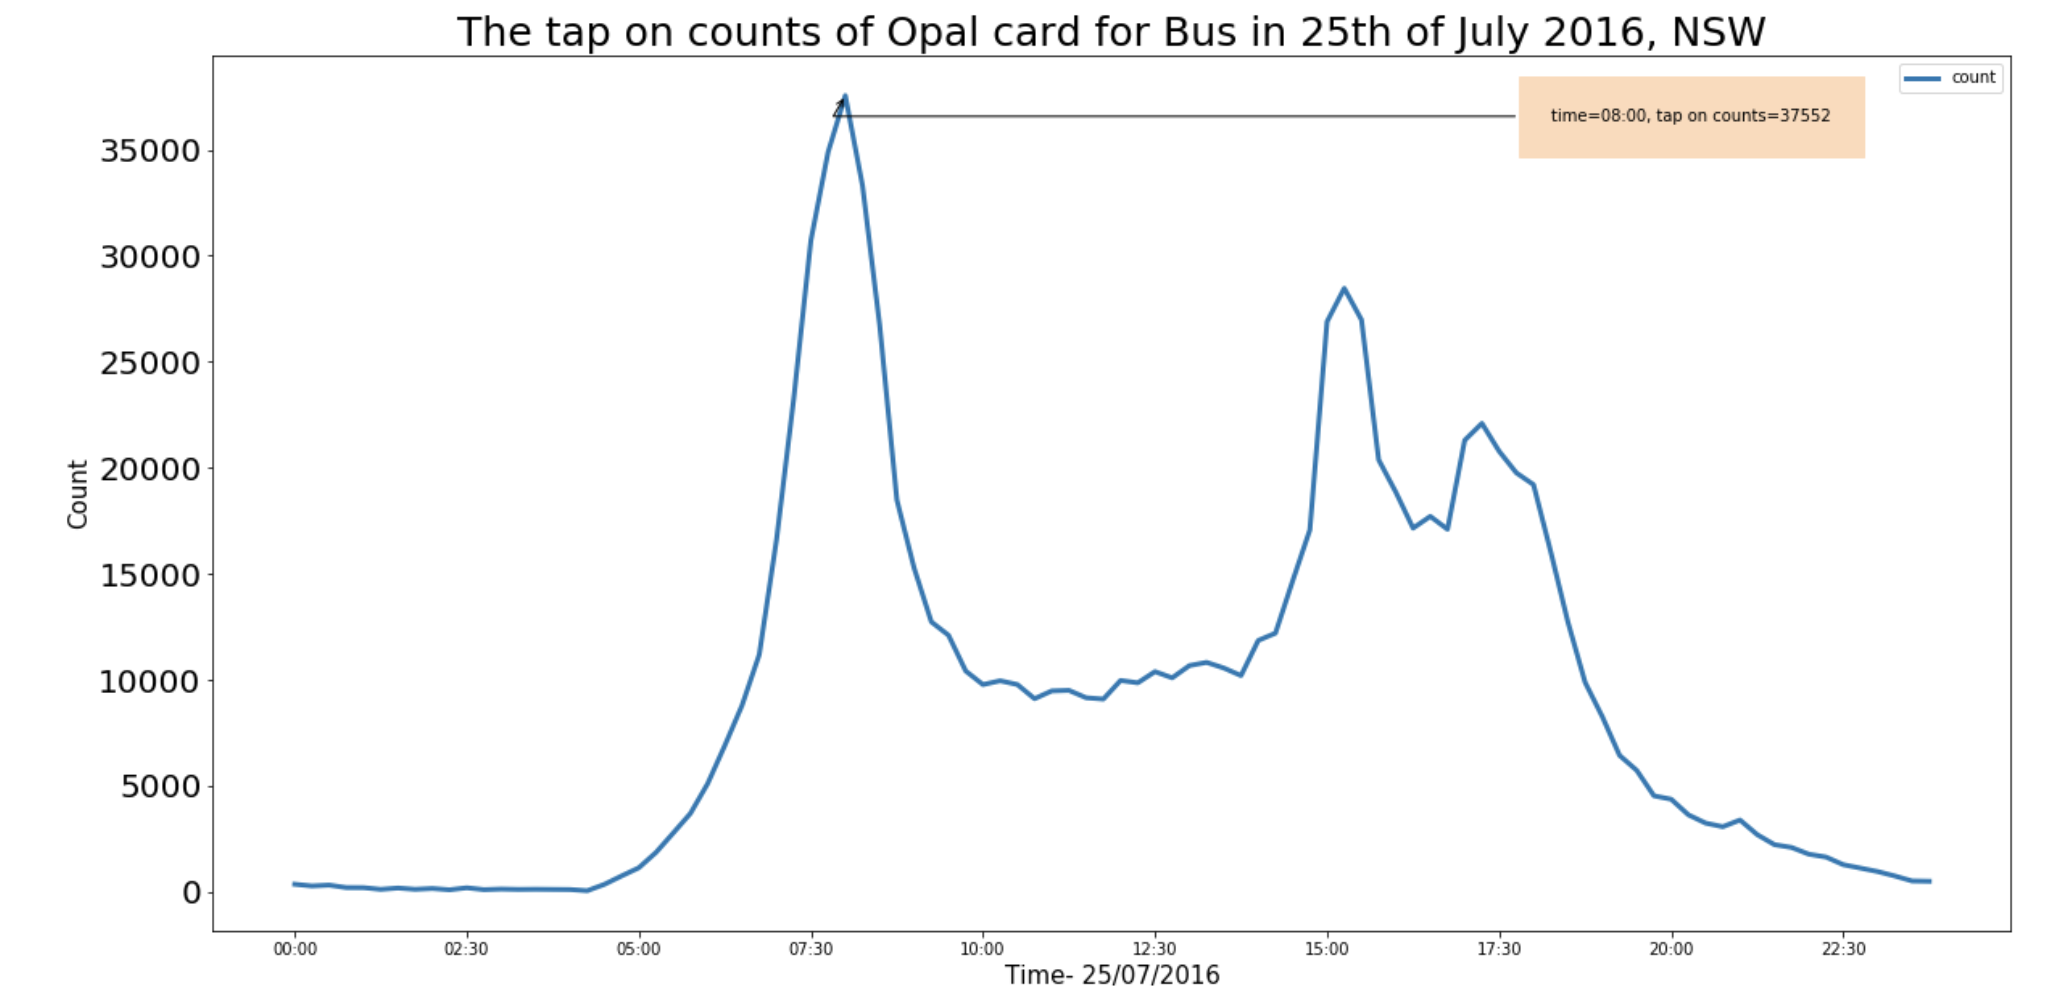

In [222]:
Image(filename='Time on 25:07.png', width=3500)

In [223]:
new_one_day.sample(10)

,time,count,new_dt
1245,11:00,9476,2016-07-25 11:00:00
1234,09:30,12100,2016-07-25 09:30:00
1206,23:15,748,2016-07-25 23:15:00
1213,18:15,16037,2016-07-25 18:15:00
1193,13:15,10822,2016-07-25 13:15:00
1172,19:45,4528,2016-07-25 19:45:00
1194,11:45,9091,2016-07-25 11:45:00
1254,06:15,6907,2016-07-25 06:15:00
1203,01:00,197,2016-07-25 01:00:00
1255,01:45,120,2016-07-25 01:45:00


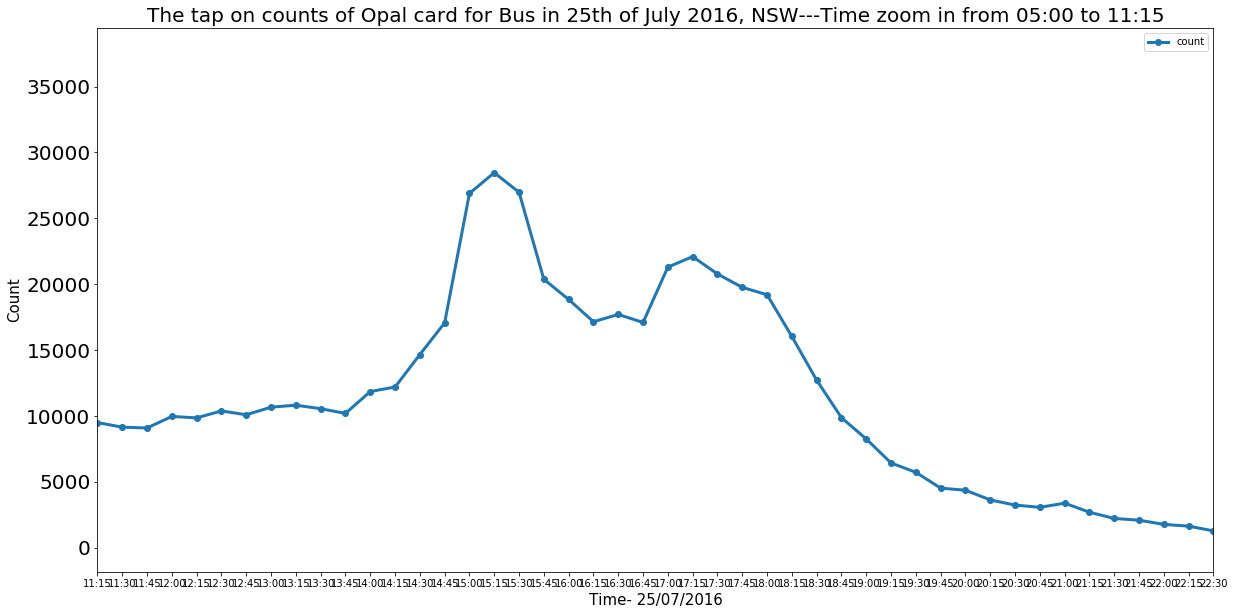

In [224]:
plt.xlim(45, 90)
new_one_day= ordered_day[ordered_day.time != '-1']
plt.plot(new_one_day['time'],new_one_day['count'], linewidth=3.0,marker='o')
plt.title('The tap on counts of Opal card for Bus in 25th of July 2016, NSW'  
          '---Time zoom in from 05:00 to 11:15', fontsize=20)

plt.xlabel('Time- 25/07/2016',fontsize=15)
plt.ylabel('Count',fontsize=15 )
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

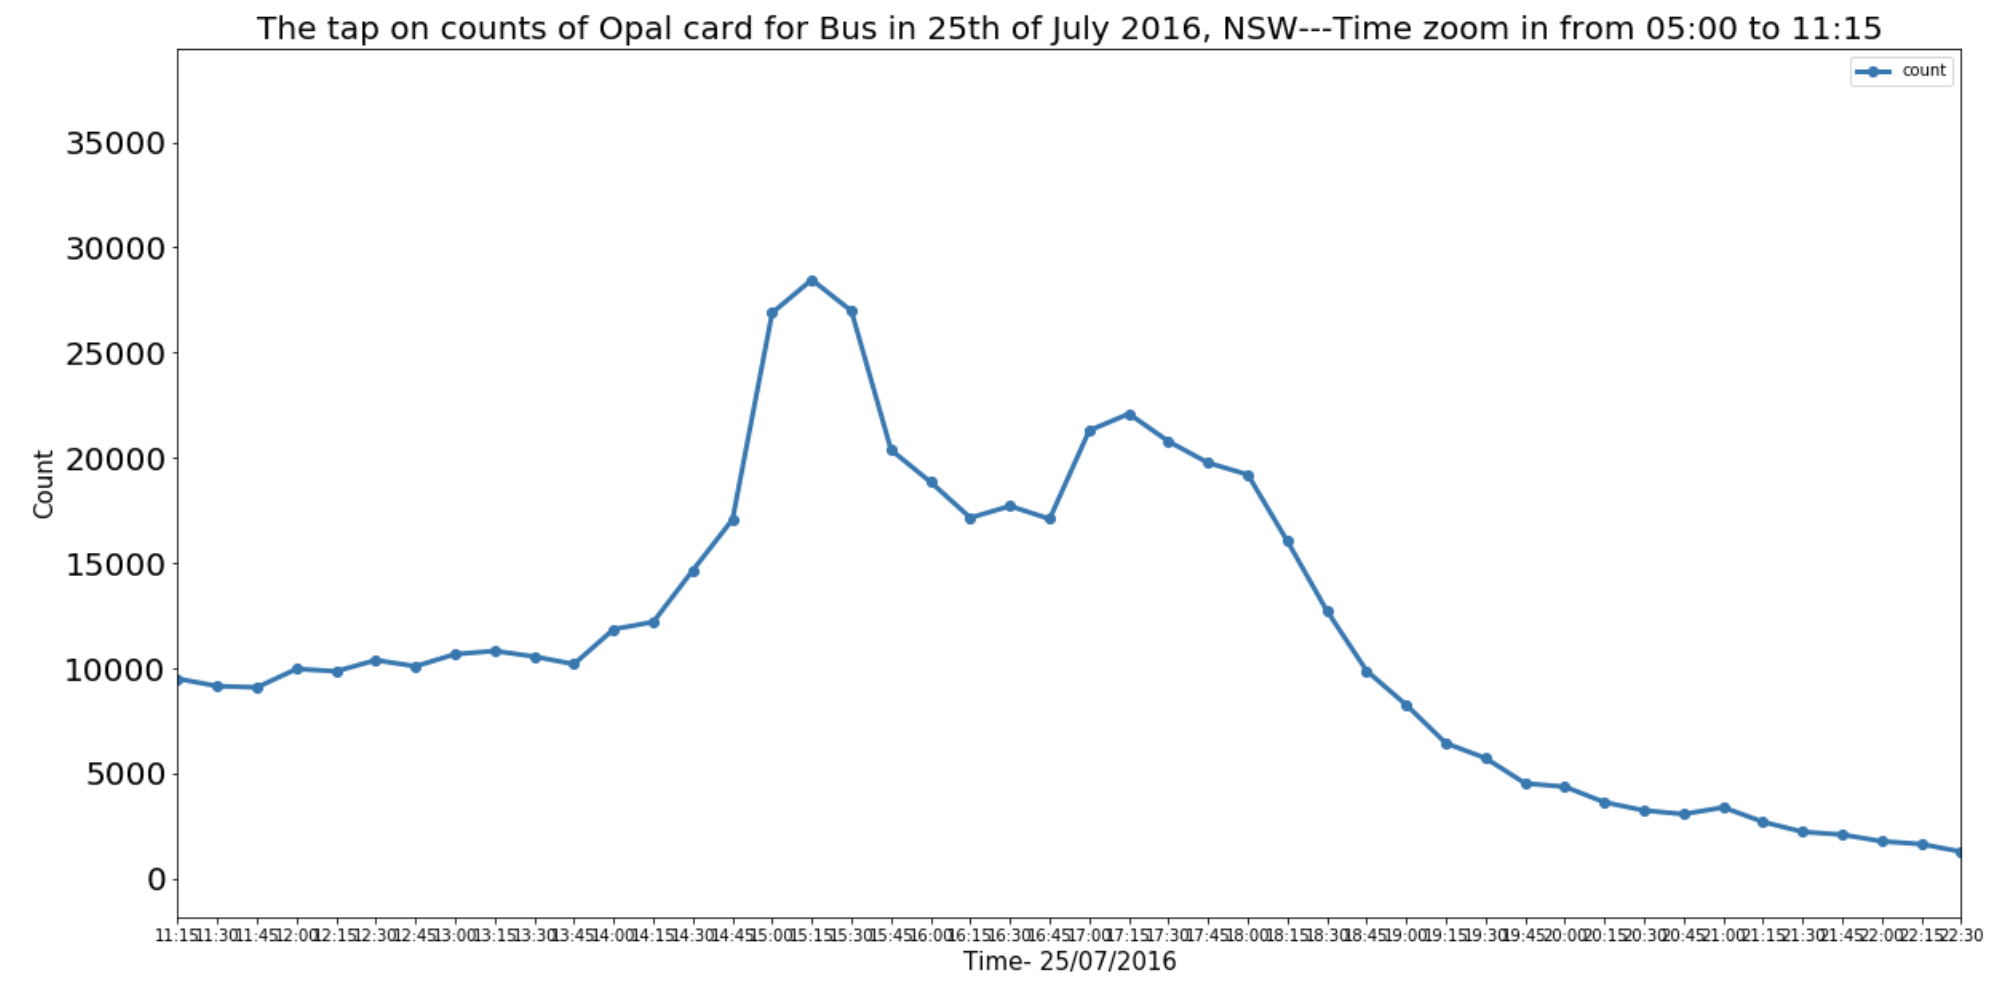

In [225]:
#if we zoom in 
Image(filename='25:07 zoomin 01.png', width=3500)

![](https://pediatricssouth.com/wp-content/uploads/2016/07/Pediatric.png)

School is finished about 3:00 pm

25th of July was a Monday

In [226]:
#What happened on 28th of July's Bus?
Second_day= tap_on.loc[(tap_on['mode']=='bus') & (tap_on['tap']=='on')& (tap_on['date']== 20160728)]

secondDay =Second_day[['time', 'count','new_dt', 'day']]
ordered_day = secondDay.sort_values(by = 'time')

#delete the "-1"
new_second_day= ordered_day[ordered_day.time != '-1']
new_second_day.sample(5)


,time,count,new_dt,day
34,01:15,178,2016-07-28 01:15:00,Thursday
58,10:15,10215,2016-07-28 10:15:00,Thursday
51,19:00,8983,2016-07-28 19:00:00,Thursday
96,21:45,3204,2016-07-28 21:45:00,Thursday
21,05:15,1894,2016-07-28 05:15:00,Thursday


In [227]:
#What happened on 31st of July's Bus?
Third_day= tap_on.loc[(tap_on['mode']=='bus') & (tap_on['tap']=='on')& (tap_on['date']== 20160731)]

thirdDay =Third_day[['time', 'count','new_dt','day']]
ordered_day = thirdDay.sort_values(by = 'time')

#delete the "-1"
new_third_day= ordered_day[ordered_day.time != '-1']
new_third_day.sample(5)

,time,count,new_dt,day
417,13:15,7570,2016-07-31 13:15:00,Sunday
429,16:00,8014,2016-07-31 16:00:00,Sunday
409,05:15,206,2016-07-31 05:15:00,Sunday
405,02:45,106,2016-07-31 02:45:00,Sunday
457,17:00,7581,2016-07-31 17:00:00,Sunday


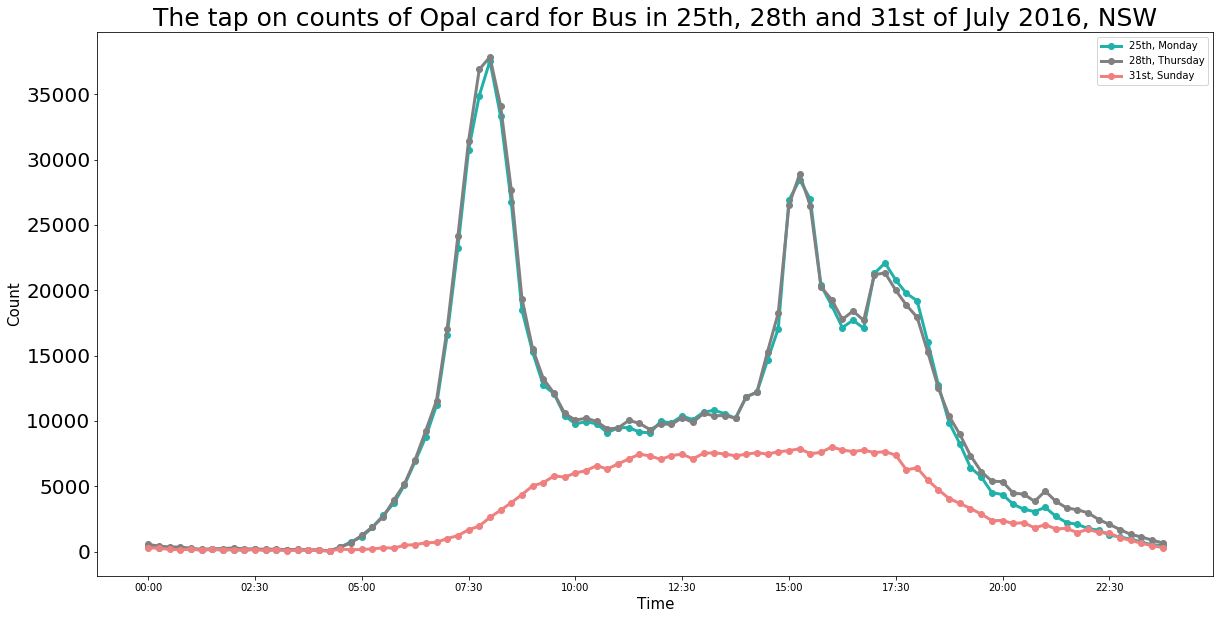

In [228]:
#Time and tap on counts
plt.plot(new_one_day['time'],new_one_day['count'], linewidth=3.0, color='lightseagreen',marker='o',label='25th, Monday')
plt.plot(new_second_day['time'],new_second_day['count'], linewidth=3.0,color='grey',marker='o',label='28th, Thursday')
plt.plot(new_third_day['time'],new_third_day['count'], linewidth=3.0,color='lightcoral',marker='o',label='31st, Sunday')

plt.title('The tap on counts of Opal card for Bus in 25th, 28th and 31st of July 2016, NSW', fontsize=25)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.legend()



xticks = plt.gca().xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 10 != 0:
        xticks[i].set_visible(False)

plt.show()

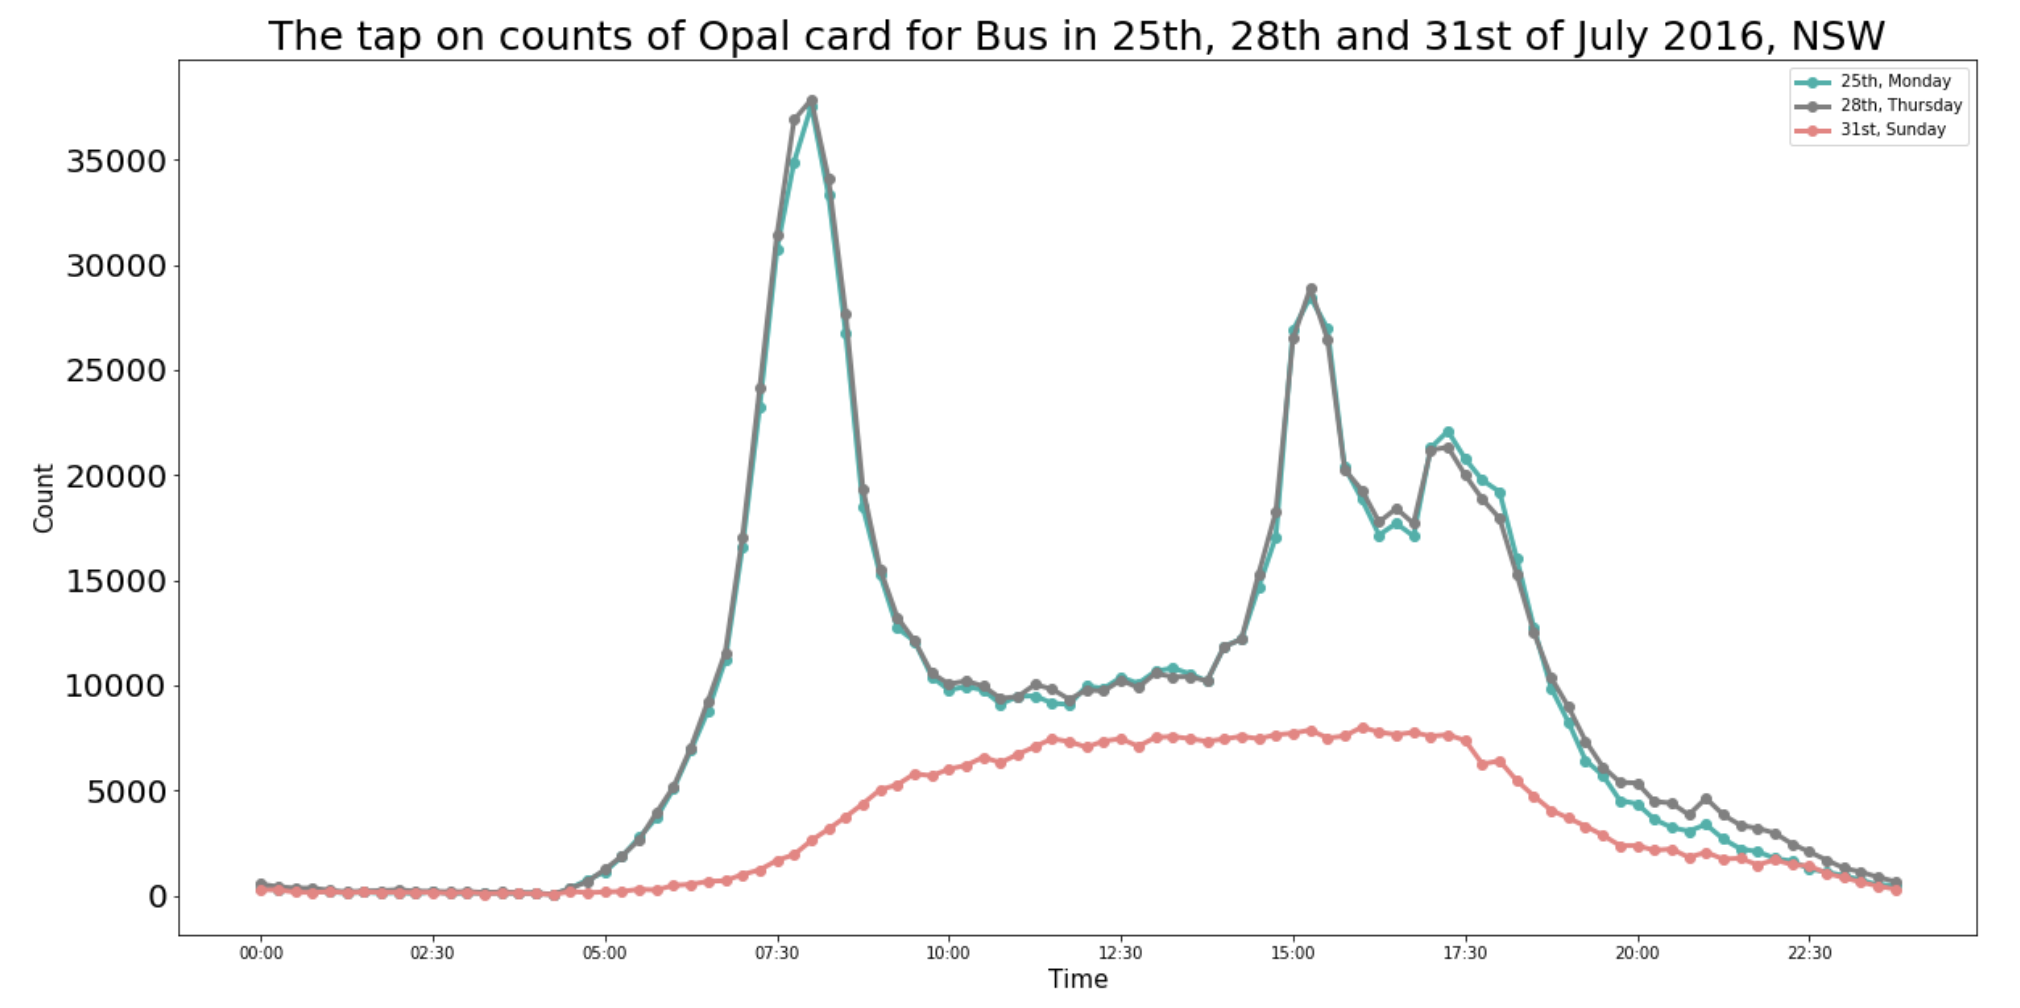

In [229]:
Image(filename='The Time chart.png', width=3500)

![](https://edge.alluremedia.com.au/uploads/businessinsider/2014/08/Opal-man.jpg)

# Thank You

Images from: 
https://thebrag.com/opal-phone-physical-cards-axed/
https://cdn.pixabay.com/photo/2017/05/08/22/38/saturday-2296766_960_720.png
https://static.nsw.gov.au/Uploads/images/1502670798/Shopping-in-Pitt-Street-Mall-Sydney.jpg
https://www.transport.nsw.gov.au/sites/default/files/styles/content_mobile_1x/public/media/images/2017/nswtrains-header.jpg?itok=sktPQLoJ
https://www.moroccoworldnews.com/wp-content/uploads/2018/03/People-going-to-work.jpg)
https://www.mykidstime.com/wp-content/uploads/2016/02/Brittany-ferries-family-shot.jpg)
    